# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**:  
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Цели иследования:
* найти интересные особенности и зависимости, которые существуют на рынке недвижимости
* найти факторы влиящие на формирование цен на рынке недвижимости
* выявить предпочтения покупателей и продавцов
* выявить факторы для лучшего сбора информфции о недвижимости

Основные этапы работы:
* Выполнить предобработку данных
* Изучить в подробностях типы данных, при необходимости переименовать колонки и привести к необходимому типу
* Подчистить набор данных от шумов, аномалий и выбивающихся значений
* Добавить новые колонки для проведения анализа
* Проведсти анализ данных, найти зависимости 
* Вывести вывод на основании анлиза данных, привести примеры некоректности в данных. Дать советы заказчику

## Открытие файла с данными и изучение общей информации. 

Импортирование пакетов, настройка для dataframe и чтение файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
filepath = '/datasets/real_estate_data.csv'

try:
    real_estate_data = pd.read_csv(filepath, sep='\t')
except:
    real_estate_data = pd.read_csv('https://code.s3.yandex.net' + filepath, sep='\t')

Вывод первых 10 строк DataFrame

In [3]:
print(f'Имеется {real_estate_data.shape[0]} наблюдений и {real_estate_data.shape[1]} атрибут в таблице')
display(real_estate_data.head(10))

Имеется 23699 наблюдений и 22 атрибут в таблице


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем 10 рандомных иследования

In [4]:
display(real_estate_data.sample(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18257,15,5500000.0,43.4,2018-09-29T00:00:00,1,2.79,25.0,20.7,20,NaN,False,False,10.7,2.0,Санкт-Петербург,33386.0,14234.0,0.0,NaN,0.0,NaN,68.0
2852,8,4000000.0,35.1,2019-01-10T00:00:00,1,2.60,9.0,18.2,2,NaN,False,False,7.0,NaN,Санкт-Петербург,23916.0,11486.0,1.0,631.0,0.0,NaN,76.0
20157,6,4300000.0,54.0,2018-12-14T00:00:00,3,2.70,4.0,38.0,4,NaN,False,False,5.8,NaN,Санкт-Петербург,36186.0,15577.0,0.0,NaN,2.0,528.0,10.0
19894,4,2990000.0,31.0,2017-02-12T00:00:00,1,NaN,7.0,18.0,6,False,False,False,5.6,1.0,Санкт-Петербург,42049.0,14554.0,1.0,608.0,0.0,NaN,44.0
14898,13,8100000.0,76.0,2018-10-11T00:00:00,3,2.65,14.0,44.5,6,NaN,False,False,10.0,NaN,Санкт-Петербург,29270.0,6642.0,0.0,NaN,3.0,247.0,190.0
3076,20,2000000.0,80.0,2018-01-03T00:00:00,3,NaN,1.0,48.5,1,NaN,False,False,10.0,NaN,Волосово,NaN,NaN,NaN,NaN,NaN,NaN,44.0
10386,20,19900000.0,126.2,2019-04-22T00:00:00,3,3.78,5.0,76.4,3,NaN,False,False,24.0,NaN,Санкт-Петербург,22928.0,2392.0,2.0,454.0,1.0,233.0,NaN
18310,10,5750000.0,51.0,2019-02-27T00:00:00,2,2.70,9.0,30.2,7,NaN,False,False,8.0,1.0,Санкт-Петербург,13315.0,14577.0,0.0,NaN,0.0,NaN,34.0
20341,1,2999000.0,36.0,2015-09-09T00:00:00,1,NaN,17.0,NaN,6,NaN,False,False,NaN,0.0,посёлок Шушары,13456.0,19242.0,0.0,NaN,1.0,807.0,436.0
8084,10,9350000.0,98.9,2016-04-13T00:00:00,4,NaN,4.0,72.7,2,False,False,False,10.0,0.0,Санкт-Петербург,20395.0,1390.0,3.0,473.0,3.0,103.0,420.0


Вывод основной инфорамации о таблице данных

In [5]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вывод распределения данных в таблице

In [6]:
real_estate_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Получение гистограммы всей таблицы

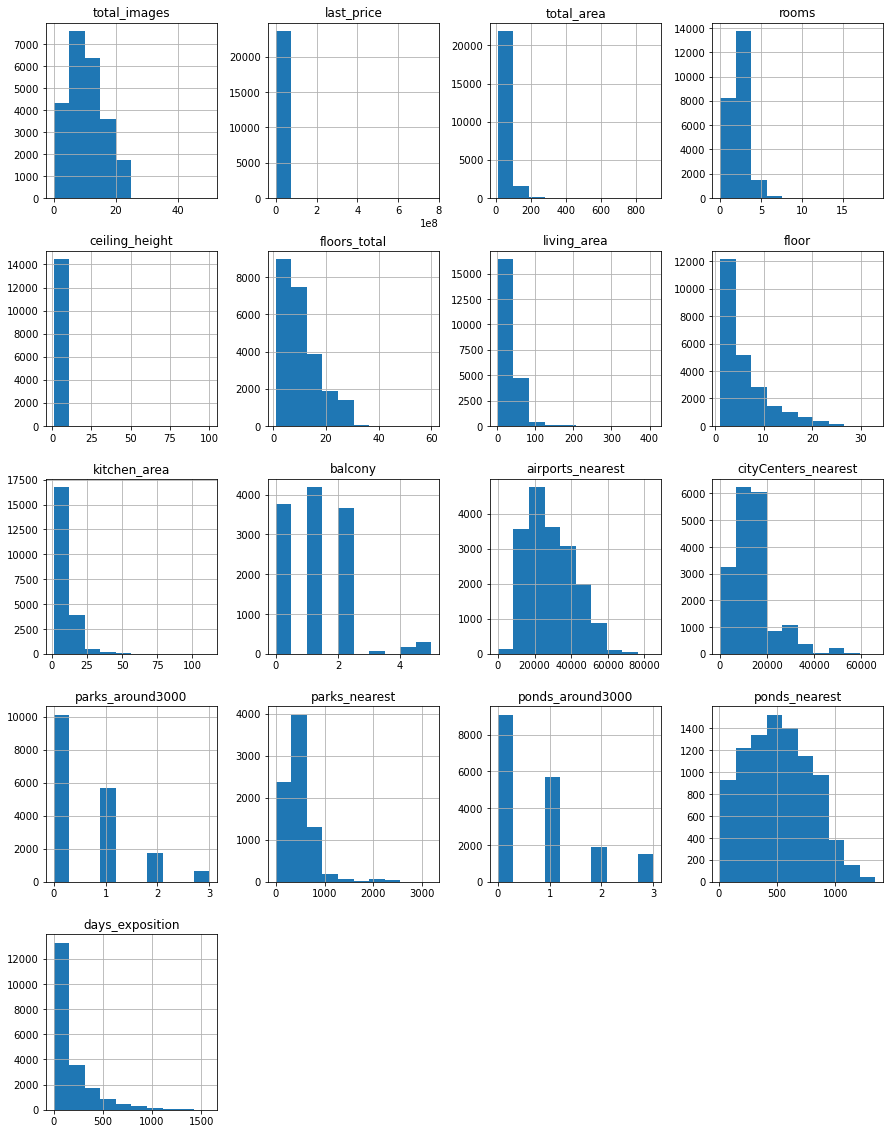

In [7]:
real_estate_data.hist(figsize=(15, 20))
plt.show();

**Выводы:**  
1. Много пустых значений в колонках
2. Неудобная расположение столбцов по наименованиям для восприятия информации
3. Наименоваине некоторых колонок сложно для понимания значения их

## Предобработка данных

### Приведем названия колонок к логичному названию

Проанализуруем названия столбцов

In [8]:
real_estate_data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Приведем названия столбцов к понятному виду для понимания и заменим новыми названиями

In [9]:
new_name_col = [
    'total_images', 'price', 'total_area_m2', 'first_day_exposition', 'number_of_rooms', 'ceiling_height_m', 
    'total_floors', 'living_area_m2', 'floor', 'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area_m2', 
    'number_of_balconies', 'city', 'airports_nearest', 'distance_city_centers_nearest', 'parks_around_3km', 'distance_nearest_park_m',
    'ponds_around_3km', 'distance_nearest_pond_m', 'days_exposition'
]

real_estate_data.set_axis(new_name_col, axis='columns', inplace=True)

In [10]:
real_estate_data.columns.to_list() # Проверка изменений названий колонок

['total_images',
 'price',
 'total_area_m2',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height_m',
 'total_floors',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'number_of_balconies',
 'city',
 'airports_nearest',
 'distance_city_centers_nearest',
 'parks_around_3km',
 'distance_nearest_park_m',
 'ponds_around_3km',
 'distance_nearest_pond_m',
 'days_exposition']

Расположим колонки, чтобы прослеживалась логика в последвательности их названий.

In [11]:
real_estate_data = real_estate_data[[
    'city',
    'total_area_m2',
    'living_area_m2',
    'kitchen_area_m2',
    'ceiling_height_m',
    'number_of_rooms',
    'number_of_balconies',
    'floor',
    'total_floors',
    'is_apartment',
    'is_studio',
    'is_open_plan',
    'price',
    'total_images',
    'airports_nearest',
    'distance_city_centers_nearest',
    'parks_around_3km',
    'distance_nearest_park_m',
    'ponds_around_3km',
    'distance_nearest_pond_m',
    'first_day_exposition',
    'days_exposition'
]]

In [12]:
display(real_estate_data.head()) # Просмотр логики названий колонок

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,airports_nearest,distance_city_centers_nearest,parks_around_3km,distance_nearest_park_m,ponds_around_3km,distance_nearest_pond_m,first_day_exposition,days_exposition
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,NaN,8,16.0,NaN,False,False,13000000.0,20,18863.0,16028.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,NaN,False,False,3350000.0,7,12817.0,18603.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,NaN,False,False,5196000.0,10,21741.0,13933.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,NaN,False,False,64900000.0,0,28098.0,6800.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,NaN,13,14.0,NaN,False,False,10000000.0,2,31856.0,8098.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0


### Изучение пропущенных значений в столбцах

In [13]:
real_estate_data.isna().sum()

city                                49
total_area_m2                        0
living_area_m2                    1903
kitchen_area_m2                   2278
ceiling_height_m                  9195
number_of_rooms                      0
number_of_balconies              11519
floor                                0
total_floors                        86
is_apartment                     20924
is_studio                            0
is_open_plan                         0
price                                0
total_images                         0
airports_nearest                  5542
distance_city_centers_nearest     5519
parks_around_3km                  5518
distance_nearest_park_m          15620
ponds_around_3km                  5518
distance_nearest_pond_m          14589
first_day_exposition                 0
days_exposition                   3181
dtype: int64

Посмотрим на незаполненость генеральной совокупности значениями, остортируем по количеству пропущеных значений на увеличение

In [14]:
pd.DataFrame(round(real_estate_data.isna().mean()*100).sort_values(ascending=False)).style.background_gradient('coolwarm')

,0
is_apartment,88.000000
distance_nearest_park_m,66.000000
distance_nearest_pond_m,62.000000
number_of_balconies,49.000000
ceiling_height_m,39.000000
airports_nearest,23.000000
ponds_around_3km,23.000000
parks_around_3km,23.000000
distance_city_centers_nearest,23.000000
days_exposition,13.000000


Посмотрим на незаполненость генеральной совокупности значениями

In [15]:
sort_empty_cсels = real_estate_data.isna().sum().sort_values() # отсортируем на увеличение
print(sort_empty_cсels)

is_studio                            0
total_area_m2                        0
total_images                         0
price                                0
is_open_plan                         0
number_of_rooms                      0
first_day_exposition                 0
floor                                0
city                                49
total_floors                        86
living_area_m2                    1903
kitchen_area_m2                   2278
days_exposition                   3181
parks_around_3km                  5518
ponds_around_3km                  5518
distance_city_centers_nearest     5519
airports_nearest                  5542
ceiling_height_m                  9195
number_of_balconies              11519
distance_nearest_pond_m          14589
distance_nearest_park_m          15620
is_apartment                     20924
dtype: int64


В данном результате видим аномалии в:  
* Отсутвующие значения в колонке `city`, их очень мало (менее 1%)
* Колонки `parks_around_3km`, `ponds_around_3km`, значение отсутвующих данных одинаково 23.28%
* В колонке `is_apartment` очень большой процент отсутвующих данных, созникает вопрос "Почему так много нету данных, Нужна ли эта колонка в таблице?"

In [16]:
# Выведет 5 строк где не указан город
display(real_estate_data.loc[real_estate_data['city'].isna()].head())

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,airports_nearest,distance_city_centers_nearest,parks_around_3km,distance_nearest_park_m,ponds_around_3km,distance_nearest_pond_m,first_day_exposition,days_exposition
1097,NaN,81.7,50.8,8.8,3.55,3,0.0,2,5.0,NaN,False,False,8600000.0,3,23478.0,4258.0,0.0,NaN,0.0,NaN,2016-04-15T00:00:00,147.0
2033,NaN,80.0,42.6,18.6,NaN,3,0.0,2,4.0,NaN,False,False,5398000.0,6,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-30T00:00:00,34.0
2603,NaN,42.7,15.6,10.7,NaN,1,0.0,3,24.0,NaN,False,False,3351765.0,20,22041.0,17369.0,0.0,NaN,1.0,374.0,2015-09-20T00:00:00,276.0
2632,NaN,62.4,33.1,8.2,NaN,2,0.0,21,24.0,NaN,False,False,5130593.0,2,22041.0,17369.0,0.0,NaN,1.0,374.0,2015-10-11T00:00:00,256.0
3574,NaN,46.5,30.8,6.5,NaN,2,0.0,5,5.0,NaN,False,False,4200000.0,10,27419.0,8127.0,0.0,NaN,1.0,603.0,2016-05-28T00:00:00,45.0


Нет возможности отследить в каком городе находиться объекты в выборке данных, поэтому из-за не незначительного количества отсутвующих данных населеного пункта удалим эти строки. 

In [17]:
real_estate_data = real_estate_data.dropna(subset=['city'])

Проверим какие города у нас есть

In [18]:
print('Количество уникальных населеных пунктов', len(real_estate_data['city'].unique()))
print(real_estate_data['city'].unique())

Количество уникальных населеных пунктов 364
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зе

В названии населеных пунктов уберем лишние названия остваим только `"город"`, `"деревня"`, `"поселок"`. Заменим букву `ё` на `е` в наименованиях.

In [19]:
real_estate_data['city'] = real_estate_data['city'].str.replace(' городского типа', '', regex=True)
real_estate_data['city'] = real_estate_data['city'].str.replace('городской ', '', regex=True)
real_estate_data['city'] = real_estate_data['city'].str.replace('коттеджный ', '', regex=True)
real_estate_data['city'] = real_estate_data['city'].str.replace(' при железнодорожной станции', '', regex=True)
real_estate_data['city'] = real_estate_data['city'].str.replace('станции ', '', regex=True)
real_estate_data['city'] = real_estate_data['city'].str.replace('садоводческое некоммерческое товарищество', '', regex=True)
real_estate_data['city'] = real_estate_data['city'].str.replace('ё', 'е', regex=True)

In [20]:
print(real_estate_data['city'].value_counts())

Санкт-Петербург                    15721
поселок Мурино                       556
поселок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
деревня Пельгора                       1
поселок Каложицы                       1
поселок Платформа 69-й километр        1
поселок Почап                          1
поселок Дзержинского                   1
Name: city, Length: 318, dtype: int64


Уменшилось на 47 нaименовний

In [21]:
print(real_estate_data['city'].unique())

['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор' 'Гатчина'
 'деревня Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши'
 'Луга' 'Волосово'

Смотри значения этажности домов недвижимости `total_floors` 

In [22]:
print(real_estate_data['total_floors'].sort_values().unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 33. 34. 35. 36. 37. 52. 60.
 nan]


In [23]:
display(real_estate_data.loc[real_estate_data['total_floors'].isna()])

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,airports_nearest,distance_city_centers_nearest,parks_around_3km,distance_nearest_park_m,ponds_around_3km,distance_nearest_pond_m,first_day_exposition,days_exposition
186,Санкт-Петербург,65.2,30.80,12.00,NaN,2,NaN,4,NaN,NaN,False,False,11640000.0,12,39197.0,12373.0,1.0,123.0,0.0,NaN,2018-10-02T00:00:00,49.0
237,Санкт-Петербург,28.1,20.75,NaN,NaN,1,0.0,1,NaN,NaN,False,False,2438033.0,4,22041.0,17369.0,0.0,NaN,1.0,374.0,2016-11-23T00:00:00,251.0
457,Санкт-Петербург,70.8,38.40,10.63,NaN,2,0.0,12,NaN,NaN,False,False,9788348.0,4,37364.0,8322.0,2.0,309.0,2.0,706.0,2015-08-01T00:00:00,727.0
671,Санкт-Петербург,93.6,47.10,16.80,NaN,3,0.0,8,NaN,NaN,False,False,6051191.0,4,22041.0,17369.0,0.0,NaN,1.0,374.0,2017-04-06T00:00:00,123.0
1757,Санкт-Петербург,39.0,NaN,NaN,NaN,1,0.0,9,NaN,NaN,False,False,3600000.0,5,22735.0,11618.0,1.0,835.0,1.0,652.0,2017-04-22T00:00:00,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,Санкт-Петербург,63.5,NaN,NaN,2.8,2,NaN,3,NaN,NaN,False,False,8500000.0,5,51340.0,15363.0,0.0,NaN,1.0,853.0,2017-05-24T00:00:00,512.0
22656,Санкт-Петербург,64.5,31.70,14.40,NaN,2,0.0,20,NaN,NaN,False,False,4574160.0,4,22041.0,17369.0,0.0,NaN,1.0,374.0,2017-04-02T00:00:00,127.0
22808,Санкт-Петербург,110.4,45.38,23.42,NaN,3,0.0,6,NaN,NaN,False,False,14569263.0,0,19095.0,4529.0,0.0,NaN,0.0,NaN,2016-11-20T00:00:00,260.0
23590,Санкт-Петербург,123.3,50.40,23.60,NaN,3,0.0,18,NaN,NaN,False,False,21187872.0,0,19095.0,4529.0,0.0,NaN,0.0,NaN,2017-04-25T00:00:00,104.0


In [24]:
real_estate_data = real_estate_data.dropna(subset=['total_floors'])

Просмотрим информация в колонке `number_of_ balconies`

In [25]:
real_estate_data['number_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [26]:
real_estate_data['number_of_balconies'].value_counts().sort_values()

3.0      81
4.0     182
5.0     304
2.0    3656
0.0    3680
1.0    4187
Name: number_of_balconies, dtype: int64

In [27]:
display(real_estate_data.loc[real_estate_data['number_of_balconies'].isna()].head(10))

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,airports_nearest,distance_city_centers_nearest,parks_around_3km,distance_nearest_park_m,ponds_around_3km,distance_nearest_pond_m,first_day_exposition,days_exposition
0,Санкт-Петербург,108.00,51.00,25.00,2.70,3,NaN,8,16.0,NaN,False,False,13000000.0,20,18863.0,16028.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN
4,Санкт-Петербург,100.00,32.00,41.00,3.03,2,NaN,13,14.0,NaN,False,False,10000000.0,2,31856.0,8098.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0
5,поселок Янино-1,30.40,14.40,9.10,NaN,1,NaN,5,12.0,NaN,False,False,2890000.0,10,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-10T00:00:00,55.0
8,поселок Мурино,33.16,15.43,8.81,NaN,1,NaN,26,27.0,NaN,False,False,2900000.0,20,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-23T00:00:00,189.0
10,Санкт-Петербург,39.60,20.30,8.50,2.67,1,NaN,3,12.0,NaN,False,False,5050000.0,5,38357.0,13878.0,1.0,310.0,2.0,553.0,2017-11-16T00:00:00,137.0
16,Санкт-Петербург,82.00,55.60,9.00,3.05,3,NaN,1,5.0,NaN,False,False,6700000.0,11,22108.0,10698.0,3.0,420.0,0.0,NaN,2017-11-23T00:00:00,397.0
19,Санкт-Петербург,121.00,76.00,12.00,2.75,3,NaN,8,16.0,NaN,False,False,14200000.0,16,38900.0,12843.0,0.0,NaN,0.0,NaN,2019-01-09T00:00:00,97.0
23,Санкт-Петербург,32.00,17.70,6.10,2.60,1,NaN,9,9.0,NaN,False,False,2950000.0,11,15414.0,14211.0,2.0,517.0,1.0,190.0,2016-10-29T00:00:00,615.0
26,Санкт-Петербург,60.00,43.00,7.00,NaN,4,NaN,4,5.0,NaN,False,False,4050000.0,6,11580.0,10510.0,0.0,NaN,1.0,95.0,2017-04-28T00:00:00,265.0
30,Коммунар,32.80,NaN,NaN,NaN,1,NaN,2,9.0,NaN,False,False,2200000.0,12,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-19T00:00:00,63.0


Данные хорошие. Даты появления этих объектов различаются по годам. Объем отсутсвующих данных по этой колонке составляет менее 1% от генеральной совокупности, предполагаю что удаление этих строк не повлияет на выводы исследования.

Предположим что продавец не указал количество балконов, так как их нету. Поэтому заменим значение `NaN` на `0`.

In [28]:
real_estate_data['number_of_balconies'] = real_estate_data['number_of_balconies'].fillna(value=0)

Колонка `is_apartment` с самым большим количеством пропущенных значений

In [29]:
real_estate_data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [30]:
real_estate_data['is_apartment'].value_counts().sort_values()

True       50
False    2710
Name: is_apartment, dtype: int64

Апартаменты есть только у 50 объектов. Предположу что апартменты очень редкий вид объектов и многие не указывают его. Заменю все пропущеные значения на `False` 

In [31]:
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].fillna(value=False)

In [32]:
real_estate_data.isna().sum().sort_values()

city                                 0
total_images                         0
price                                0
is_open_plan                         0
first_day_exposition                 0
is_apartment                         0
total_floors                         0
is_studio                            0
number_of_balconies                  0
number_of_rooms                      0
total_area_m2                        0
floor                                0
living_area_m2                    1865
kitchen_area_m2                   2222
days_exposition                   3171
parks_around_3km                  5500
ponds_around_3km                  5500
distance_city_centers_nearest     5501
airports_nearest                  5524
ceiling_height_m                  9084
distance_nearest_pond_m          14529
distance_nearest_park_m          15535
dtype: int64

Проверим пустые значения в колонка связаные с парком, построим сводную таблицу

In [33]:
list_real_nan_park = pd.pivot_table(data=real_estate_data, index='city',
                               values=['parks_around_3km', 'distance_nearest_park_m'])
display(list_real_nan_park)

,distance_nearest_park_m,parks_around_3km
city,,
Зеленогорск,210.625000,1.916667
Колпино,495.481203,0.522255
Красное Село,468.400000,0.482759
Кронштадт,324.574713,1.789474
Ломоносов,389.062500,0.242424
Павловск,379.538462,1.552632
Петергоф,419.559441,1.338308
Пушкин,404.297170,0.747967
Санкт-Петербург,498.338298,0.627606


У объектов где не указано прослеживается связь где нет парков, в колонке `distance_nearest_park_m` не проставлены значения. Заменим значения на 0

In [34]:
real_estate_data['distance_nearest_park_m'] = real_estate_data['distance_nearest_park_m'].fillna(value=0.0)

Аналогичным способом проверим водоемы.

In [35]:
list_real_nan_pond = pd.pivot_table(data=real_estate_data, index='city',
                               values=['ponds_around_3km', 'distance_nearest_pond_m'])
display(list_real_nan_pond)

,distance_nearest_pond_m,ponds_around_3km
city,,
Зеленогорск,485.888889,0.875000
Колпино,532.268421,0.997033
Красное Село,445.500000,0.091954
Кронштадт,343.413793,1.936842
Ломоносов,550.048193,1.128788
Павловск,493.382353,1.842105
Петергоф,513.367521,1.308458
Пушкин,482.988701,0.872629
Санкт-Петербург,520.391129,0.770188


Видно такую же связь между отсутсвием водоема в населеном пункте и пропущенных значений. Заменим значения на 0.0

In [36]:
real_estate_data['distance_nearest_pond_m'] = real_estate_data['distance_nearest_pond_m'].fillna(value=0.0)

In [37]:
real_estate_data.isna().sum()

city                                0
total_area_m2                       0
living_area_m2                   1865
kitchen_area_m2                  2222
ceiling_height_m                 9084
number_of_rooms                     0
number_of_balconies                 0
floor                               0
total_floors                        0
is_apartment                        0
is_studio                           0
is_open_plan                        0
price                               0
total_images                        0
airports_nearest                 5524
distance_city_centers_nearest    5501
parks_around_3km                 5500
distance_nearest_park_m             0
ponds_around_3km                 5500
distance_nearest_pond_m             0
first_day_exposition                0
days_exposition                  3171
dtype: int64

In [38]:
# Результатом будет за какой период у нас представлена информация
print(real_estate_data['first_day_exposition'].min(), real_estate_data['first_day_exposition'].max())

2014-11-27T00:00:00 2019-05-03T00:00:00


В таблице представлены наблюдения за 4 с половиной года.

In [39]:
# получить список где нет водоемов
city_is_pond = real_estate_data.loc[real_estate_data['ponds_around_3km'].isnull()]

# вывести 10 населенных пунктов где не укызывали водоемы
print(city_is_pond['city'].value_counts().head(15))
print(f'Пропущены значения в {city_is_pond.shape[0]} наблюдениях')

поселок Мурино             552
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
поселок Бугры              113
Сланцы                     112
Волхов                     111
Кингисепп                  104
Тосно                      104
Никольское                  93
Name: city, dtype: int64
Пропущены значения в 5500 наблюдениях


Вывод:  
1. Нужно будет разобраться с дубликатами "Кудрово" и "деревня Кудрово", это разные населеные пункты или дубликат  
Пока оставим эти значения

### Приведение колонок к нужным типам данным

Приведем колонку `first_day_exposition` к типу данных `datatime`

In [40]:
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Переведем измерение в колонках `airports_nearest`, `distance_city_centers_nearest`, `distance_nearest_park_m`, `distance_nearest_pond_m` в километры из метров

In [41]:
real_estate_data = real_estate_data.assign(airports_nearest=lambda x: x['airports_nearest'] / 1000,
                                          distance_city_centers_nearest=lambda x: x['distance_city_centers_nearest'] / 1000,
                                          distance_nearest_park_m=lambda x: x['distance_nearest_park_m'] / 1000, 
                                          distance_nearest_pond_m=lambda x: x['distance_nearest_pond_m'] / 1000)

In [42]:
# Rename columns
real_estate_data = real_estate_data.rename(columns={'airports_nearest':'distance_airport_km',
                                'distance_city_centers_nearest':'distance_city_centers_km',
                                'distance_nearest_park_m':'distance_nearest_park_km',
                                'distance_nearest_pond_m':'distance_nearest_pond_km'})

In [43]:
real_estate_data['distance_airport_km'] = real_estate_data['distance_airport_km'].round(decimals=2)
real_estate_data['distance_city_centers_km'] = real_estate_data['distance_city_centers_km'].round(decimals=2)
real_estate_data['distance_nearest_park_km'] = real_estate_data['distance_nearest_park_km'].round(decimals=2)
real_estate_data['distance_nearest_pond_km'] = real_estate_data['distance_nearest_pond_km'].round(decimals=2)

Проверка изменений наименовний колонок

In [44]:
display(real_estate_data.head())

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,distance_airport_km,distance_city_centers_km,parks_around_3km,distance_nearest_park_km,ponds_around_3km,distance_nearest_pond_km,first_day_exposition,days_exposition
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,0.0,8,16.0,False,False,False,13000000.0,20,18.86,16.03,1.0,0.48,2.0,0.76,2019-03-07,NaN
1,поселок Шушары,40.4,18.6,11.0,NaN,1,2.0,1,11.0,False,False,False,3350000.0,7,12.82,18.60,0.0,0.00,0.0,0.00,2018-12-04,81.0
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0.0,4,5.0,False,False,False,5196000.0,10,21.74,13.93,1.0,0.09,2.0,0.57,2015-08-20,558.0
3,Санкт-Петербург,159.0,NaN,NaN,NaN,3,0.0,9,14.0,False,False,False,64900000.0,0,28.10,6.80,2.0,0.08,3.0,0.23,2015-07-24,424.0
4,Санкт-Петербург,100.0,32.0,41.0,3.03,2,0.0,13,14.0,False,False,False,10000000.0,2,31.86,8.10,2.0,0.11,1.0,0.05,2018-06-19,121.0


### Проверим на уникальные значения в колонке `ceiling_height_m`

In [45]:
real_estate_data['ceiling_height_m'].sort_values(ascending=False).head(25)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
20478     27.0
22938     27.0
21824     27.0
4876      27.0
10773     27.0
17857     27.0
5246      27.0
5807      27.0
5669      26.0
11285     25.0
9379      25.0
4643      25.0
14382     25.0
18545     25.0
6246      25.0
355       25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
Name: ceiling_height_m, dtype: float64

In [46]:
median_ceiling_height_city = pd.pivot_table(data=real_estate_data, index='city',
                               values=['ceiling_height_m']).sort_values(by='ceiling_height_m', ascending=False)
print(median_ceiling_height_city.head(10))

                       ceiling_height_m
city                                   
деревня Нижняя                27.000000
деревня Мины                  27.000000
поселок Большая Ижора          4.662500
поселок Новый Свет             4.105625
Бокситогорск                   3.900000
Луга                           3.269355
деревня Нурма                  3.200000
поселок Ропша                  3.200000
Волхов                         3.151207
деревня Ваганово               3.150000


В двух деревнях хоромы?

In [47]:
real_estate_data['ceiling_height_m'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height_m, dtype: float64

In [48]:
print('Количество пустых значений {0}'.format(real_estate_data['ceiling_height_m'].isna().sum()))

Количество пустых значений 9084


Выборки значений показывают:  
*  есть аномальные значения это ниже 2 метров и более 5 метров, есть 100 метров
* 50% процентиль на отметке - 2.6 метров, среднее - 2.7

In [49]:
# Уберем строки где высота потолков превышает 40 метров
real_estate_data = real_estate_data.loc[(real_estate_data['ceiling_height_m'] < 40.0) | (real_estate_data['ceiling_height_m'].isna())]

Найдем медиану высоты потолков по населенным пунктам. Подставим это значение в колонку 'ceiling_height_m' с привязкой к населеному пункту

In [50]:
import warnings
warnings.filterwarnings('ignore')

for city_name in real_estate_data['city'].unique():
    median_val = real_estate_data.loc[real_estate_data['city'] == city_name, 'ceiling_height_m'].median()
    real_estate_data.loc[(real_estate_data['city'] == city_name) & (real_estate_data['ceiling_height_m'].isna()), 'ceiling_height_m'] = median_val

In [51]:
print('Количество пустых значений {0}'.format(real_estate_data['ceiling_height_m'].isna().sum()))

Количество пустых значений 99


Все что не запонилось заполняем медианой

In [52]:
real_estate_data.loc[real_estate_data['ceiling_height_m'].isna(), 'ceiling_height_m'] = real_estate_data['ceiling_height_m'].median()

In [53]:
print('Доля недвижимости с высотой потолков ниже 2.2 метра:', 
      len(real_estate_data.query('ceiling_height_m < 2.2')) / len(real_estate_data))
print('Доля недвижимости с высотой потолков выше 5 метров:', 
      len(real_estate_data.query('ceiling_height_m > 5.0')) / len(real_estate_data))

Доля недвижимости с высотой потолков ниже 2.2 метра: 0.000594126633848243
Доля недвижимости с высотой потолков выше 5 метров: 0.0015277542013240537


Удалим строки в которых высота ниже 2.2 метра и выше 5.0

In [54]:
real_estate_data = real_estate_data.loc[(real_estate_data['ceiling_height_m'] > 2.0) | (real_estate_data['ceiling_height_m'].isna())]
real_estate_data = real_estate_data.loc[(real_estate_data['ceiling_height_m'] < 5.0 ) | (real_estate_data['ceiling_height_m'].isna())]

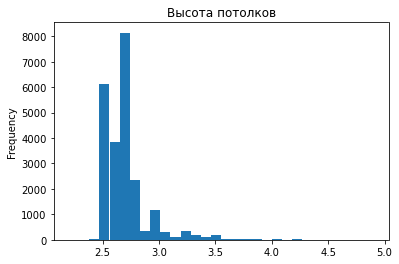

In [55]:
real_estate_data['ceiling_height_m'].sort_values().plot(kind='hist', title='Высота потолков', bins=30);

In [56]:
real_estate_data['ceiling_height_m'].describe()

count    23513.000000
mean         2.702923
std          0.219817
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.900000
Name: ceiling_height_m, dtype: float64

**Вывод**  
Обработали высоту потолков и не потеряли 38% генеральной совокупности, стоит лучше разобраться в появлении значений аномалий 100 метров и 27 метров в этой колонке в будуж

### Проверим на уникальные значения в колонке дистинции до областного города

In [57]:
median_distance_city = pd.pivot_table(data=real_estate_data, index='city',
                               values=['distance_city_centers_km']).sort_values(by='distance_city_centers_km', ascending=False)
print(median_distance_city.head(10))

                    distance_city_centers_km
city                                        
поселок Молодежное                 65.528000
Зеленогорск                        54.618750
Ломоносов                          50.740076
Кронштадт                          49.180426
поселок Репино                     43.392500
поселок Белоостров                 38.870000
поселок Саперный                   35.853333
Петергоф                           35.468507
Сестрорецк                         34.624262
Павловск                           33.207105


In [58]:
median_distance_city.columns

Index(['distance_city_centers_km'], dtype='object')

In [59]:
print('Количество пустых значений {0}'.format(real_estate_data['distance_city_centers_km'].isna().sum()))

Количество пустых значений 5480


In [60]:
for city_name in real_estate_data['city'].unique():
    median_val = real_estate_data.loc[real_estate_data['city'] == city_name, 'distance_city_centers_km'].median()
    real_estate_data.loc[(real_estate_data['distance_city_centers_km'].isna()) & (real_estate_data['city'] == city_name), 'distance_city_centers_km'] = median_val

In [61]:
print('Количество пустых значений {0}'.format(real_estate_data['distance_city_centers_km'].isna().sum()))

Количество пустых значений 5411


In [62]:
display(real_estate_data.head())

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,distance_airport_km,distance_city_centers_km,parks_around_3km,distance_nearest_park_km,ponds_around_3km,distance_nearest_pond_km,first_day_exposition,days_exposition
0,Санкт-Петербург,108.0,51.0,25.0,2.700,3,0.0,8,16.0,False,False,False,13000000.0,20,18.86,16.03,1.0,0.48,2.0,0.76,2019-03-07,NaN
1,поселок Шушары,40.4,18.6,11.0,2.615,1,2.0,1,11.0,False,False,False,3350000.0,7,12.82,18.60,0.0,0.00,0.0,0.00,2018-12-04,81.0
2,Санкт-Петербург,56.0,34.3,8.3,2.700,2,0.0,4,5.0,False,False,False,5196000.0,10,21.74,13.93,1.0,0.09,2.0,0.57,2015-08-20,558.0
3,Санкт-Петербург,159.0,NaN,NaN,2.700,3,0.0,9,14.0,False,False,False,64900000.0,0,28.10,6.80,2.0,0.08,3.0,0.23,2015-07-24,424.0
4,Санкт-Петербург,100.0,32.0,41.0,3.030,2,0.0,13,14.0,False,False,False,10000000.0,2,31.86,8.10,2.0,0.11,1.0,0.05,2018-06-19,121.0


Проверим значения в колонках `'total_area_m2'`, `'living_area_m2'`, `'kitchen_area_m2'`

In [63]:
real_estate_data[['total_area_m2', 'living_area_m2', 'kitchen_area_m2']].describe()

,total_area_m2,living_area_m2,kitchen_area_m2
count,23513.000000,21653.000000,21303.000000
mean,60.299388,34.440841,10.560018
std,35.536363,22.001334,5.891937
min,12.000000,2.000000,1.300000
25%,40.000000,18.600000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.700000,42.300000,12.000000
max,900.000000,409.700000,112.000000


Колонки `number_of_balconies`, `total_floors`, `parks_around_3km`, `ponds_around_3km`, `price` приведем к целочисленому значению.

In [64]:
real_estate_data['number_of_balconies'] = real_estate_data['number_of_balconies'].astype('int')
real_estate_data['total_floors'] = real_estate_data['total_floors'].astype('int')
real_estate_data['price'] = real_estate_data['price'].astype('int')
# real_estate_data['parks_around_3km'] = real_estate_data['parks_around_3km'].astype('int')
# real_estate_data['ponds_around_3km'] = real_estate_data['ponds_around_3km'].astype('int')
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].astype('bool')


### Устранение неявных дубликатов

Проверить количество дублирующихся строк

In [65]:
print(real_estate_data.duplicated().sum())

0


Дубликатов не выявлено

**Вывод:**
* В наборе данных было сложно ориетироваться, колонки были перепутаны по смыслу, привел к должному виду
* Некоторые названия колонок несли недостаточный смысл в своем названии, переименовал колонки
* Было очень много пропусков в колонке апартаменты, стоит задуматься нужна ли эта колонка для формы недвижимости.
* Заменил пропущенные значения в колонках дистанции до областного города и высота потолка медианными значениями для этого населеного пункта
* Привели колонку времени к нужному типу данных
* После чистки данных не обнаружены дубликаты данных

## Посчитайте и добавьте в таблицу новые столбцы

Посмотрим на информацию о наборе данных

In [66]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23513 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   city                      23513 non-null  object        
 1   total_area_m2             23513 non-null  float64       
 2   living_area_m2            21653 non-null  float64       
 3   kitchen_area_m2           21303 non-null  float64       
 4   ceiling_height_m          23513 non-null  float64       
 5   number_of_rooms           23513 non-null  int64         
 6   number_of_balconies       23513 non-null  int32         
 7   floor                     23513 non-null  int64         
 8   total_floors              23513 non-null  int32         
 9   is_apartment              23513 non-null  bool          
 10  is_studio                 23513 non-null  bool          
 11  is_open_plan              23513 non-null  bool          
 12  price             

В набор данных добавим столбцы о дне недели, месяце и годе публикации объявления об объекте недвижимости

In [67]:
real_estate_data = real_estate_data.assign(
    days_of_week_exposition=lambda x : x.first_day_exposition.dt.day_name(),
    month_exposition=real_estate_data['first_day_exposition'].dt.month_name(),
    year_exposition=real_estate_data['first_day_exposition'].dt.year
)
display(real_estate_data.head())

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,distance_airport_km,distance_city_centers_km,parks_around_3km,distance_nearest_park_km,ponds_around_3km,distance_nearest_pond_km,first_day_exposition,days_exposition,days_of_week_exposition,month_exposition,year_exposition
0,Санкт-Петербург,108.0,51.0,25.0,2.700,3,0,8,16,False,False,False,13000000,20,18.86,16.03,1.0,0.48,2.0,0.76,2019-03-07,NaN,Thursday,March,2019
1,поселок Шушары,40.4,18.6,11.0,2.615,1,2,1,11,False,False,False,3350000,7,12.82,18.60,0.0,0.00,0.0,0.00,2018-12-04,81.0,Tuesday,December,2018
2,Санкт-Петербург,56.0,34.3,8.3,2.700,2,0,4,5,False,False,False,5196000,10,21.74,13.93,1.0,0.09,2.0,0.57,2015-08-20,558.0,Thursday,August,2015
3,Санкт-Петербург,159.0,NaN,NaN,2.700,3,0,9,14,False,False,False,64900000,0,28.10,6.80,2.0,0.08,3.0,0.23,2015-07-24,424.0,Friday,July,2015
4,Санкт-Петербург,100.0,32.0,41.0,3.030,2,0,13,14,False,False,False,10000000,2,31.86,8.10,2.0,0.11,1.0,0.05,2018-06-19,121.0,Tuesday,June,2018


In [68]:
temp = real_estate_data.query('first_day_exposition == "2019-03-07"').head(10)
temp['first_day_exposition'] =  temp['first_day_exposition'].dt.date
temp['month'] = temp['first_day_exposition'].astype('datetime64[M]') 
temp

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,distance_airport_km,distance_city_centers_km,parks_around_3km,distance_nearest_park_km,ponds_around_3km,distance_nearest_pond_km,first_day_exposition,days_exposition,days_of_week_exposition,month_exposition,year_exposition,month
0,Санкт-Петербург,108.0,51.0,25.0,2.70,3,0,8,16,False,False,False,13000000,20,18.86,16.03,1.0,0.48,2.0,0.76,2019-03-07,NaN,Thursday,March,2019,2019-03-01
3102,Санкт-Петербург,36.0,15.4,11.5,2.52,1,2,7,10,False,False,False,5250000,14,29.79,12.65,0.0,0.00,1.0,0.82,2019-03-07,NaN,Thursday,March,2019,2019-03-01
3707,Санкт-Петербург,42.0,21.0,11.9,2.70,1,0,9,17,False,False,False,4899000,14,10.13,13.39,0.0,0.00,1.0,0.96,2019-03-07,19.0,Thursday,March,2019,2019-03-01
5579,деревня Старое Хинколово,34.0,16.8,8.5,2.70,1,0,2,9,False,False,False,2600000,7,NaN,NaN,NaN,0.00,NaN,0.00,2019-03-07,19.0,Thursday,March,2019,2019-03-01
6894,Санкт-Петербург,30.0,NaN,NaN,2.60,1,0,3,9,False,False,False,3700000,7,27.23,12.35,1.0,0.55,0.0,0.00,2019-03-07,26.0,Thursday,March,2019,2019-03-01
8292,Санкт-Петербург,65.2,31.0,13.4,2.75,2,2,4,9,False,False,False,8600000,8,34.28,15.38,1.0,0.35,3.0,0.33,2019-03-07,30.0,Thursday,March,2019,2019-03-01
8358,Санкт-Петербург,31.5,18.5,5.2,2.60,1,0,2,4,False,False,False,3150000,6,21.54,13.10,1.0,0.46,0.0,0.00,2019-03-07,28.0,Thursday,March,2019,2019-03-01
9506,Сестрорецк,31.0,17.0,5.5,2.50,1,1,3,5,False,False,False,3050000,12,61.42,36.12,0.0,0.00,1.0,0.19,2019-03-07,15.0,Thursday,March,2019,2019-03-01
9700,Санкт-Петербург,67.5,44.6,9.3,2.54,3,2,5,17,False,False,False,9300000,8,37.28,12.80,1.0,0.83,1.0,0.93,2019-03-07,NaN,Thursday,March,2019,2019-03-01
11257,Санкт-Петербург,90.0,55.5,8.5,2.60,3,3,12,16,False,False,False,8600000,20,21.30,14.52,1.0,0.84,2.0,0.84,2019-03-07,20.0,Thursday,March,2019,2019-03-01


Подготовим функции для замены значений в колонках `'days_of_week_exposition'`, `month_exposition`

In [69]:
def day_week(row):
    if row['days_of_week_exposition'] == 'Monday':
        return 'Понедельник'
    elif row['days_of_week_exposition'] == 'Tuesday':
        return 'Вторник'
    elif row['days_of_week_exposition'] == 'Wednesday':
        return 'Среда'
    elif row['days_of_week_exposition'] == 'Thursday':
        return 'Четверг'
    elif row['days_of_week_exposition'] == 'Friday':
        return 'Пятница'
    elif row['days_of_week_exposition'] == 'Saturday':
        return 'Суббота'
    elif row['days_of_week_exposition'] == 'Sunday':
        return 'Воскресенье'
    else:
        return 'Неизвестно'
    
def month_rename(row):
    if row['month_exposition'] == 'January':
        return 'Январь'
    elif row['month_exposition'] == 'February':
        return 'Февраль'
    elif row['month_exposition'] == 'March':
        return 'Март'
    elif row['month_exposition'] == 'April':
        return 'Апрель'
    elif row['month_exposition'] == 'May':
        return 'Май'
    elif row['month_exposition'] == 'June':
        return 'Июнь'
    elif row['month_exposition'] == 'July':
        return 'Июль'
    elif row['month_exposition'] == 'August':
        return 'Август'
    elif row['month_exposition'] == 'September':
        return 'Сентябрь'
    elif row['month_exposition'] == 'October':
        return 'Октябрь'
    elif row['month_exposition'] == 'November':
        return 'Ноябрь'
    elif row['month_exposition'] == 'December':
        return 'Декабрь'
    else:
        return 'Неизвестно'

Заменим значения в колонках на более понятные значения

In [70]:
real_estate_data['days_of_week_exposition'] = \
    real_estate_data.apply(day_week, axis=1)

real_estate_data['month_exposition'] = \
    real_estate_data.apply(month_rename, axis=1)

Добавим колонку в которой будет отображаться статус `первого` и `последнего` этажа, все остальные этажи запишем как `'другой'`.

In [71]:
def floors_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors']:
        return 'последний'
    else: 
        return 'другой' 

In [72]:
real_estate_data['floor_status'] = real_estate_data.apply(floors_status, axis=1)

Посчитаем цену за квадратный метр

In [73]:
real_estate_data['price_per_meter'] = \
    (real_estate_data['price'] / real_estate_data['total_area_m2']).round(decimals=2)

In [74]:
display(real_estate_data.head(10))

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,distance_airport_km,distance_city_centers_km,parks_around_3km,distance_nearest_park_km,ponds_around_3km,distance_nearest_pond_km,first_day_exposition,days_exposition,days_of_week_exposition,month_exposition,year_exposition,floor_status,price_per_meter
0,Санкт-Петербург,108.00,51.00,25.00,2.700,3,0,8,16,False,False,False,13000000,20,18.86,16.03,1.0,0.48,2.0,0.76,2019-03-07,NaN,Четверг,Март,2019,другой,120370.37
1,поселок Шушары,40.40,18.60,11.00,2.615,1,2,1,11,False,False,False,3350000,7,12.82,18.60,0.0,0.00,0.0,0.00,2018-12-04,81.0,Вторник,Декабрь,2018,первый,82920.79
2,Санкт-Петербург,56.00,34.30,8.30,2.700,2,0,4,5,False,False,False,5196000,10,21.74,13.93,1.0,0.09,2.0,0.57,2015-08-20,558.0,Четверг,Август,2015,другой,92785.71
3,Санкт-Петербург,159.00,NaN,NaN,2.700,3,0,9,14,False,False,False,64900000,0,28.10,6.80,2.0,0.08,3.0,0.23,2015-07-24,424.0,Пятница,Июль,2015,другой,408176.10
4,Санкт-Петербург,100.00,32.00,41.00,3.030,2,0,13,14,False,False,False,10000000,2,31.86,8.10,2.0,0.11,1.0,0.05,2018-06-19,121.0,Вторник,Июнь,2018,другой,100000.00
5,поселок Янино-1,30.40,14.40,9.10,2.650,1,0,5,12,False,False,False,2890000,10,NaN,NaN,NaN,0.00,NaN,0.00,2018-09-10,55.0,Понедельник,Сентябрь,2018,другой,95065.79
6,поселок Парголово,37.30,10.60,14.40,2.640,1,1,6,26,False,False,False,3700000,6,53.00,19.14,0.0,0.00,0.0,0.00,2017-11-02,155.0,Четверг,Ноябрь,2017,другой,99195.71
7,Санкт-Петербург,71.60,NaN,18.90,2.700,2,2,22,24,False,False,False,7915000,5,23.98,11.63,0.0,0.00,0.0,0.00,2019-04-18,NaN,Четверг,Апрель,2019,другой,110544.69
8,поселок Мурино,33.16,15.43,8.81,2.700,1,0,26,27,False,False,False,2900000,20,NaN,NaN,NaN,0.00,NaN,0.00,2018-05-23,189.0,Среда,Май,2018,другой,87454.76
9,Санкт-Петербург,61.00,43.60,6.50,2.500,3,2,7,9,False,False,False,5400000,18,50.90,15.01,0.0,0.00,0.0,0.00,2017-02-26,289.0,Воскресенье,Февраль,2017,другой,88524.59


Округлим дистанцию до `парков`, `водоемов`, `аэропорта` и `центра города` до целого числа, так как в метрах очень много уникальных значений.

In [75]:
real_estate_data['distance_nearest_park_km'] = real_estate_data['distance_nearest_park_km'].apply(np.ceil).astype(int)
real_estate_data['distance_nearest_pond_km'] = real_estate_data['distance_nearest_pond_km'].apply(np.ceil).astype(int)

In [76]:
real_estate_data['distance_city_centers_km'] = real_estate_data['distance_city_centers_km'].round()

real_estate_data['distance_airport_km'] = real_estate_data['distance_airport_km'].round()

## Проведите исследовательский анализ данных

Оставшиеся данные изучим более подробно

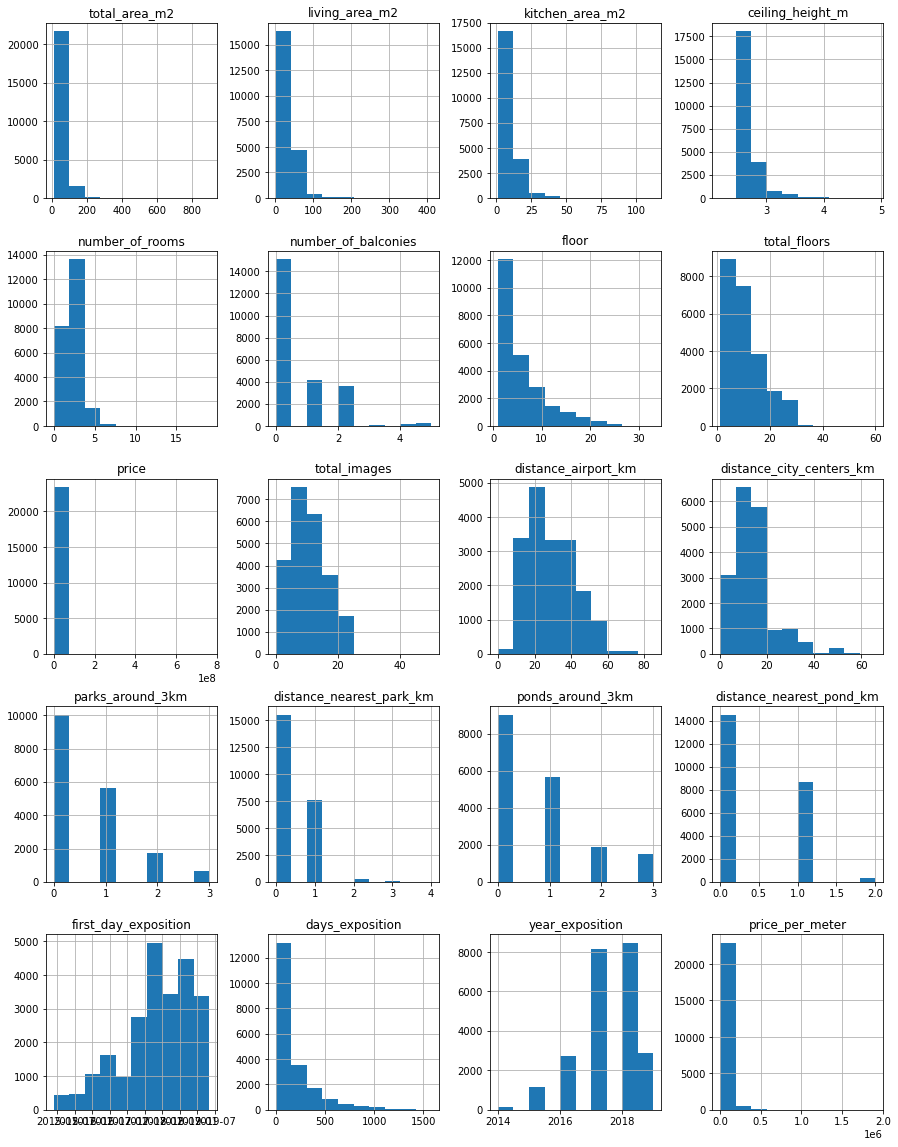

In [77]:
real_estate_data.hist(figsize=(15, 20))
plt.show()

### Общая площадь

In [78]:
real_estate_data['total_area_m2'].describe()

count    23513.000000
mean        60.299388
std         35.536363
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area_m2, dtype: float64

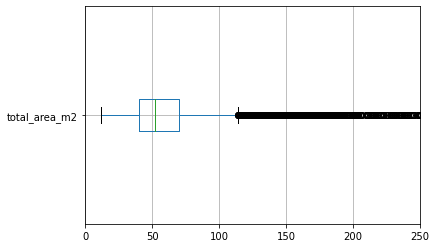

In [79]:
plt.xlim(0, 250)
real_estate_data.boxplot(column=['total_area_m2'], vert=False)
plt.show()

* Первый квартиль находитьс на уровне 40
* Третий квартиль находится на уровне 70
* Минимальное значение равняется 12
* Правый ус закнчивается на 120  

**Вывод**  
Нормальные значения для общей площади от 12 до 120, остальное буду считать выбросом

In [80]:
good_total_area = real_estate_data.query('total_area_m2 >= 12 and total_area_m2 <= 120')

### Жилая площадь и площадь кухни

In [81]:
real_estate_data[['living_area_m2','kitchen_area_m2']].describe()

,living_area_m2,kitchen_area_m2
count,21653.000000,21303.000000
mean,34.440841,10.560018
std,22.001334,5.891937
min,2.000000,1.300000
25%,18.600000,7.000000
50%,30.000000,9.100000
75%,42.300000,12.000000
max,409.700000,112.000000


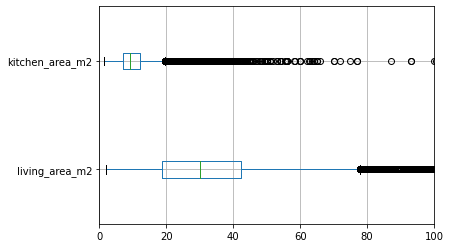

In [82]:
plt.xlim(0, 100)
real_estate_data.boxplot(column=['living_area_m2','kitchen_area_m2'], vert=False)
plt.show()

**Кухни**  
* 1ый квартиль - 18.6 метров
* 3ий квартиль - 42.3 метра
* Медиана - 9.1 метра площадь кухни
* Левый ус начинается с 1.3 метра, очень мало для кухни.
* Правый ус, выбросы начинаются с 19 метров

**Жилая площадь**
* 1ый квартиль - 7 метров
* 3ий квартиль - 12 метров
* Медиана - 30 метров 
* Левый ус начинается с 2 метра, очень мало для жилой площади.
* Правый ус, выбросы начинаются с 78 метров

**Выводы**
* Очень подозрительно выглядят данные с минимальной площадью кухни и жилой площади.

In [83]:
bad_ckiken_and_living = real_estate_data.query('living_area_m2 <= 2.0 or kitchen_area_m2 <= 1.3')
display(bad_ckiken_and_living)

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,distance_airport_km,distance_city_centers_km,parks_around_3km,distance_nearest_park_km,ponds_around_3km,distance_nearest_pond_km,first_day_exposition,days_exposition,days_of_week_exposition,month_exposition,year_exposition,floor_status,price_per_meter
13915,Санкт-Петербург,52.0,2.0,9.0,3.0,2,0,2,6,False,False,False,6350000,20,32.0,7.0,0.0,0,1.0,2,2018-02-06,91.0,Вторник,Февраль,2018,другой,122115.38
20217,Санкт-Петербург,28.5,19.5,1.3,2.8,1,0,10,14,False,False,False,4250000,7,37.0,13.0,0.0,0,0.0,0,2019-05-01,NaN,Среда,Май,2019,другой,149122.81
21758,поселок Мурино,23.0,2.0,NaN,2.7,0,0,22,24,False,True,False,2330000,0,NaN,NaN,NaN,0,NaN,0,2018-01-01,66.0,Понедельник,Январь,2018,другой,101304.35


### Изучим цены на квартиры

In [84]:
real_estate_data['price'].describe()

count    2.351300e+04
mean     6.527233e+06
std      1.083949e+07
min      1.219000e+04
25%      3.405000e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: price, dtype: float64

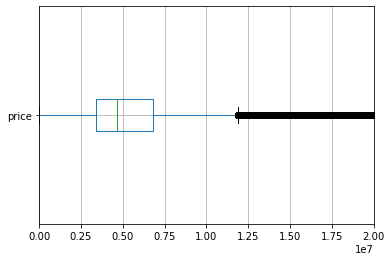

In [85]:
plt.xlim(0, 2.0e+07)
real_estate_data.boxplot(column=['price'], vert=False)
plt.show()

* 1ый квартиль - 3.4 млн
* 3ий квартиль - 6.8 млн
* Медиана - 4.65 мдн
* Левый ус начинается с _12190_, что выглядит очень неправдободобно!
* Правый ус, выбросы начинаются с 12 млн.

Проверим квартиры дешевле 500тыс и дороже 100млн., в то время как средняя стоимость квартир 6.5млн

In [86]:
cheap_price = real_estate_data.query('price < 500000')
cheap_price = real_estate_data.query('not price == 12190')
cheap_price.sort_values('price').head()

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,distance_airport_km,distance_city_centers_km,parks_around_3km,distance_nearest_park_km,ponds_around_3km,distance_nearest_pond_km,first_day_exposition,days_exposition,days_of_week_exposition,month_exposition,year_exposition,floor_status,price_per_meter
14911,поселок Свирь,54.0,NaN,NaN,2.700,2,0,3,3,False,False,False,430000,5,NaN,NaN,NaN,0,NaN,0,2018-06-26,44.0,Вторник,Июнь,2018,последний,7962.96
17456,Сланцы,30.4,16.0,6.0,2.500,1,0,1,2,False,False,False,430000,7,NaN,NaN,NaN,0,NaN,0,2019-04-22,NaN,Понедельник,Апрель,2019,первый,14144.74
16274,деревня Старополье,40.0,NaN,NaN,2.700,1,0,1,5,False,False,False,440000,18,NaN,NaN,NaN,0,NaN,0,2018-07-10,45.0,Вторник,Июль,2018,первый,11000.00
5698,поселок Будогощь,42.0,23.0,5.8,2.615,2,0,1,1,False,False,False,450000,7,NaN,NaN,NaN,0,NaN,0,2017-07-31,233.0,Понедельник,Июль,2017,первый,10714.29
9581,деревня Старополье,43.4,30.3,5.5,2.700,2,0,3,5,False,False,False,450000,7,NaN,NaN,NaN,0,NaN,0,2018-08-31,96.0,Пятница,Август,2018,другой,10368.66


Уберем из набора данных квартиру в Санкт-Петербурге площадью 109 кв.м. и стоимостью 12190. Возможно продавец указывал стоимость 12млн. 190тыс.

In [87]:
real_estate_data = real_estate_data.query('not price == 12190')

Посмотрим на квартиры дороже 100 млн и площадью менее 100 метров. Выведу с самой меньшей площадью квартиры 

In [88]:
expensive_price = real_estate_data.query('price > 10e+6 and total_area_m2 < 100')
display(expensive_price.sort_values('total_area_m2').head(10))

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,distance_airport_km,distance_city_centers_km,parks_around_3km,distance_nearest_park_km,ponds_around_3km,distance_nearest_pond_km,first_day_exposition,days_exposition,days_of_week_exposition,month_exposition,year_exposition,floor_status,price_per_meter
14741,Санкт-Петербург,31.00,NaN,NaN,2.70,1,0,1,4,False,False,False,12000000,1,24.0,2.0,3.0,1,3.0,1,2018-01-05,90.0,Пятница,Январь,2018,первый,387096.77
4859,Санкт-Петербург,33.00,NaN,NaN,3.50,1,0,2,5,False,False,False,28000000,16,23.0,1.0,3.0,1,3.0,1,2019-04-29,NaN,Понедельник,Апрель,2019,другой,848484.85
17172,Санкт-Петербург,33.00,NaN,NaN,3.50,1,0,2,5,False,False,False,28000000,14,23.0,1.0,3.0,1,3.0,1,2019-04-30,NaN,Вторник,Апрель,2019,другой,848484.85
21238,Всеволожск,38.12,16.83,10.7,2.70,1,1,4,10,False,False,False,24412900,1,NaN,NaN,NaN,0,NaN,0,2018-06-27,44.0,Среда,Июнь,2018,другой,640422.35
8712,Санкт-Петербург,42.70,27.50,3.7,2.80,2,0,4,4,False,False,False,14948000,6,25.0,4.0,1.0,1,1.0,1,2017-09-15,167.0,Пятница,Сентябрь,2017,последний,350070.26
10193,Санкт-Петербург,45.00,NaN,NaN,2.95,1,0,8,8,False,False,False,16000000,9,25.0,5.0,2.0,1,0.0,0,2019-02-25,NaN,Понедельник,Февраль,2019,последний,355555.56
4713,Санкт-Петербург,45.00,29.00,7.0,2.70,2,0,4,8,False,False,False,16000000,11,25.0,4.0,1.0,1,3.0,1,2018-07-14,102.0,Суббота,Июль,2018,другой,355555.56
2688,Санкт-Петербург,45.70,23.70,7.5,3.35,2,0,3,5,False,False,False,10400000,9,23.0,2.0,3.0,1,1.0,1,2017-12-12,370.0,Вторник,Декабрь,2017,другой,227571.12
12353,Санкт-Петербург,47.00,22.00,16.0,2.70,1,1,5,10,False,False,False,12500000,1,35.0,16.0,2.0,1,3.0,1,2019-02-14,NaN,Четверг,Февраль,2019,другой,265957.45
11004,Санкт-Петербург,47.00,24.00,8.0,2.50,2,0,3,5,False,False,False,10400000,12,23.0,2.0,3.0,1,1.0,1,2018-05-23,127.0,Среда,Май,2018,другой,221276.60


Очень странно выглядит квартира в Всеволожске полощадью 33 кв.м. и стоимостью 244 млн. Самые дорогие квартиры в Санкт-Петербурге площадью 30 кв.м. и стоимостью более 100 млн., возможно стоит выделить в категорию "Элитное жилье"

**Вывод**
Стоит расматривать квартиры от 400тыс., так эта стоимость квартир для поселков и деревень оптимальна. А верхний предел оставить в районе 3 квартиля (12.5 млн). Остальные данные отнести к выбросам.

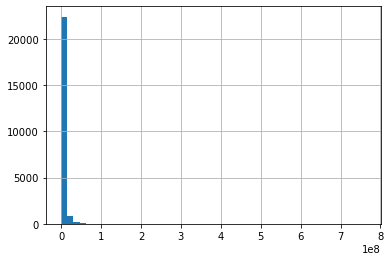

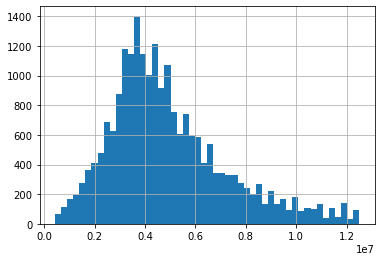

In [89]:
real_estate_data.price.hist(bins=50)
plt.show()

good_price = real_estate_data.query('price >= 4.0e+5 and price <= 12.5e+6')
good_price.price.hist(bins=50)
plt.show()

### Изучим высоту потолков

In [90]:
real_estate_data['ceiling_height_m'].describe()

count    23512.000000
mean         2.702921
std          0.219821
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.900000
Name: ceiling_height_m, dtype: float64

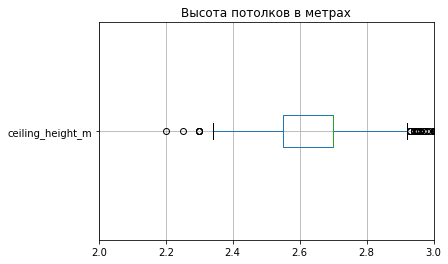

In [91]:
plt.title('Высота потолков в метрах')
plt.xlim(2, 3)
real_estate_data.boxplot(column=['ceiling_height_m'], vert=False)
plt.show()

* 1ый квартиль - 2.6 метра
* 3ий квартиль - 2.7 метра
* Медиана - 2.7 метра
* Левый ус начинается с 2.2 метра
* Правый ус, выбросы начинаются с 2.9 метра

**Выводы**  
* Эти данные предобработаны нами в предыдущих шагах. 
* Предлагаю использовать в дальнейшем данные высота потолков от 2.2 метра до 4 метров, остальное считать выбросами. Так как в Санкт-Петербурге есть старинный жилищный фонд, и цена на них очень сильно корелировать поэтому беру такую высокую границу потолков

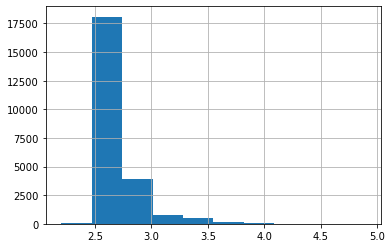

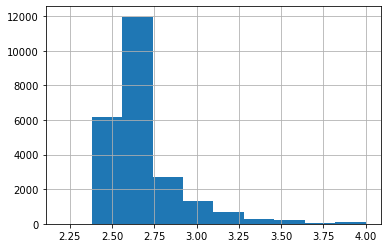

In [92]:
real_estate_data['ceiling_height_m'].hist()
plt.show()

good_ceiling_height = real_estate_data.query('ceiling_height_m >= 2.2 and ceiling_height_m <= 4.0')

good_ceiling_height['ceiling_height_m'].hist()
plt.show()

### Изучим количество комнат

In [93]:
real_estate_data['number_of_rooms'].describe()

count    23512.000000
mean         2.070772
std          1.078286
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: number_of_rooms, dtype: float64

In [94]:
# Проверка недвежимости с 0 комнат и условим что студия
real_estate_data.query('number_of_rooms < 1 and is_studio == True').head()

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,distance_airport_km,distance_city_centers_km,parks_around_3km,distance_nearest_park_km,ponds_around_3km,distance_nearest_pond_km,first_day_exposition,days_exposition,days_of_week_exposition,month_exposition,year_exposition,floor_status,price_per_meter
144,поселок Мурино,27.00,15.50,NaN,2.700,0,2,2,24,False,True,False,2450000,1,NaN,NaN,NaN,0,NaN,0,2017-03-30,181.0,Четверг,Март,2017,другой,90740.74
440,Санкт-Петербург,27.11,24.75,NaN,2.700,0,2,4,17,False,True,False,2480000,8,38.0,15.0,0.0,0,2.0,1,2018-03-12,64.0,Понедельник,Март,2018,другой,91479.16
608,поселок Шушары,25.00,NaN,NaN,2.615,0,0,7,10,False,True,False,1850000,2,NaN,24.0,NaN,0,NaN,0,2019-02-20,29.0,Среда,Февраль,2019,другой,74000.00
697,деревня Кудрово,24.10,17.50,NaN,2.750,0,0,21,25,False,True,False,2500000,12,NaN,NaN,NaN,0,NaN,0,2017-12-01,201.0,Пятница,Декабрь,2017,другой,103734.44
716,поселок Шушары,17.00,12.00,NaN,2.700,0,0,1,9,False,True,False,1500000,5,19.0,30.0,0.0,0,0.0,0,2017-06-07,40.0,Среда,Июнь,2017,первый,88235.29


In [95]:
# Проверка недвежимости с 0 комнат и условим что свободной планировкой
real_estate_data.query('number_of_rooms < 1 and is_open_plan == True').head()

,city,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors,is_apartment,is_studio,is_open_plan,price,total_images,distance_airport_km,distance_city_centers_km,parks_around_3km,distance_nearest_park_km,ponds_around_3km,distance_nearest_pond_km,first_day_exposition,days_exposition,days_of_week_exposition,month_exposition,year_exposition,floor_status,price_per_meter
349,деревня Кудрово,25.0,17.0,NaN,2.75,0,0,1,14,False,False,True,2320000,4,NaN,NaN,NaN,0,NaN,0,2017-09-27,45.0,Среда,Сентябрь,2017,первый,92800.00
508,поселок Парголово,34.4,24.3,NaN,2.64,0,1,19,26,False,False,True,3375000,0,53.0,19.0,0.0,0,1.0,1,2017-03-28,430.0,Вторник,Март,2017,другой,98110.47
780,поселок Мурино,26.1,NaN,NaN,2.70,0,1,8,18,False,False,True,2600000,9,NaN,NaN,NaN,0,NaN,0,2018-02-20,45.0,Вторник,Февраль,2018,другой,99616.86
839,поселок Новый Свет,35.0,15.0,NaN,2.70,0,1,3,5,False,False,True,1900000,14,NaN,NaN,NaN,0,NaN,0,2017-04-14,7.0,Пятница,Апрель,2017,другой,54285.71
946,поселок Мурино,23.0,18.0,NaN,2.70,0,2,7,27,False,False,True,2200000,5,NaN,NaN,NaN,0,NaN,0,2016-09-27,483.0,Вторник,Сентябрь,2016,другой,95652.17


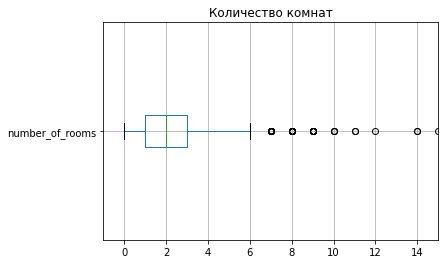

In [96]:
plt.title('Количество комнат')
plt.xlim(-1, 15)
real_estate_data.boxplot(column=['number_of_rooms'], vert=False)
plt.show()

* 1ый квартиль - 1 комната
* 3ий квартиль - 3 комнаты
* Медиана - 2 комнаты
* Левый ус начинается с 0 комнат
* Правый ус, выбросы начинаются с 6 комнат

**Выводы**  
* Недвижимость с 0 комнат, нельзя отбрасывать, т.к. это недвижимость категории "Студия" или "Свободная планировка"
* Найдена связь у недвижимости категоии "Студия" или "Свободная планировка" пропущены значения "Площадь кухни"
* Предлагаю использовать в дальнейшем количество комнат от 0 до 6, больше 6 комнат выбросы

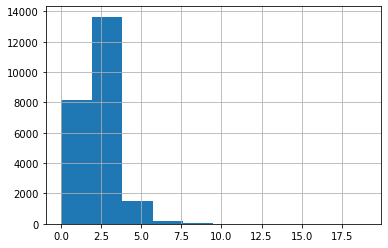

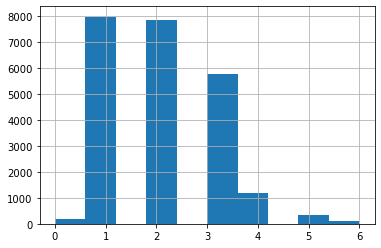

In [97]:
real_estate_data['number_of_rooms'].hist()
plt.show()

good_number_of_rooms = real_estate_data.query('number_of_rooms <= 6')

good_number_of_rooms['number_of_rooms'].hist()
plt.show()

### Изучим этажи

In [98]:
real_estate_data.floor.describe()

count    23512.000000
mean         5.878360
std          4.870856
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

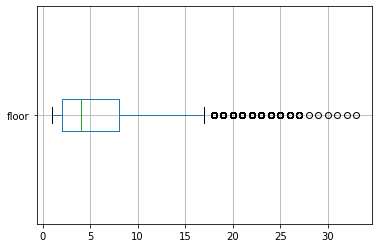

In [99]:
real_estate_data.boxplot(column=['floor'], vert=False)
plt.show()

* 1ый квартиль - 2 этаж
* 3ий квартиль - 8 этаж
* Медиана - 4 этаж
* Левый ус начинается с 1 этажа
* Правый ус, выбросы начинаются с 17 этажа

**Выводы**  
Судя по данным много квартир "Советской постройки" до 9 этажей. Есть новостройки этажностью до 33 этажа. Считаю данными приемлемыми для работы с ними.

In [100]:
real_estate_data['total_floors'].describe()

count    23512.000000
mean        10.678632
std          6.590967
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: total_floors, dtype: float64

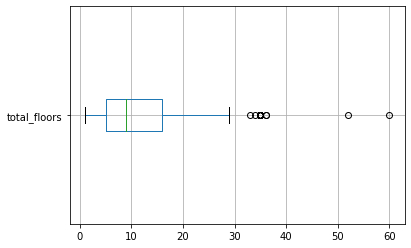

In [101]:
real_estate_data.boxplot(column=['total_floors'], vert=False)
plt.show()

* 1ый квартиль - 2 этаж
* 3ий квартиль - 16 этаж
* Медиана - 9 этаж
* Левый ус начинается с 1 этажа
* Правый ус, выбросы начинаются с 28 этажа

Сильно выделяются этажность домов 52 и 60 этажа. Согласно предыдущему предположению удалим строки домов выше 33 этажа

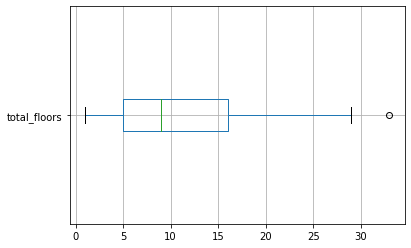

In [102]:
good_total_floors = real_estate_data.query('total_floors <= 33').reset_index()
good_total_floors.boxplot(column=['total_floors'], vert=False)
plt.show()

**Вывод**
Данные выглядят более правдоподобно. Этажность домов лежит в диапозоне от 5 до 16 этажей.Дома этажностью выше 16 встречаются реже.

In [103]:
# Выведет частоту статусов этажей на которой находиться недвижимость
real_estate_data['floor_status'].value_counts()

другой       17293
последний     3316
первый        2903
Name: floor_status, dtype: int64

In [104]:
# Выведет доли статусов этажей на которой находиться недвижимость
real_estate_data['floor_status'].value_counts() / real_estate_data.shape[0]

другой       0.735497
последний    0.141034
первый       0.123469
Name: floor_status, dtype: float64

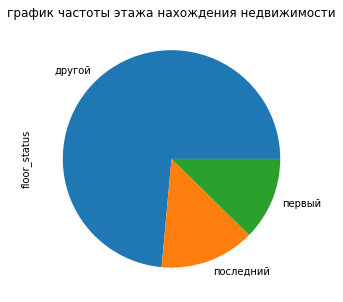

In [105]:
real_estate_data['floor_status'].value_counts().\
    plot(kind='pie',style='o-', title="график частоты этажа нахождения недвижимости", grid=True, figsize=(10, 5));

**Вывод**
* Недвижимость находящаяся на первом и последнем этажаж, в процентом отношении  не сильно отличаются в среднем 11% для первого и 12% для последнего этажа
* Недвижимость находящаяся между первым и последним этажам занимает оставшуюся львиную долю в 75%

### Изучим растояние до центра города и до аэропорта

In [106]:
real_estate_data[['distance_city_centers_km', 'distance_airport_km']].describe()

,distance_city_centers_km,distance_airport_km
count,18101.000000,18009.000000
mean,14.192255,28.805875
std,8.617504,12.637751
min,0.000000,0.000000
25%,9.000000,19.000000
50%,13.000000,27.000000
75%,16.000000,37.000000
max,66.000000,85.000000


Уберем строки в которой растояние до аэропорта меньше 1 километра

In [107]:
real_estate_data = real_estate_data.query('distance_airport_km > 1').reset_index()

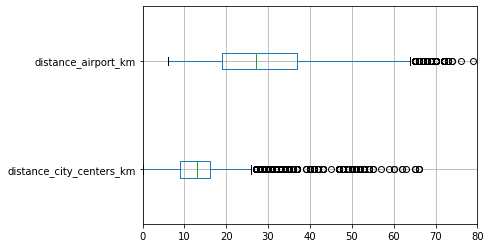

In [108]:
plt.xlim(0, 80)
real_estate_data.boxplot(column=['distance_city_centers_km', 'distance_airport_km'], vert=False)
plt.show()

**Растояние до аэропорта**  
* 1ый квартиль - 19 км.
* 3ий квартиль - 38 км.
* Медиана - 27 км.
* Левый ус начинается с 6.5 км, что выглядит более правдоподобно
* Правый ус 66 км.

**Растояние до центра города**
* 1ый квартиль - 9 км
* 3ий квартиль - 16 км
* Медиана - 13 км. 
* Левый ус начинается с 180 метров
* Правый ус до 26 км.

**Выводы**
* Большая часть значений растояния до аэропорта в диапозоне 18 до 37 км, но значения меньше 1 квартиля и выше 3 квартиля не стоит отбрасывать. Так как аэропорт находиться на дальнем растоянии от центра города, и тем более он дальше для пригорода Санкт-Петербурга.
* Большая часть значений растояния до цетра городы в диапозоне 9 до 16 км. Естественно выглядит 180м для центра города. А вот растояние более 30 км можно считать выбросами.

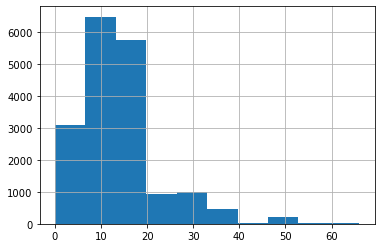

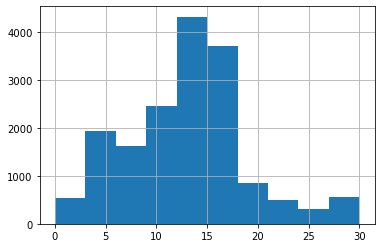

In [109]:
real_estate_data['distance_city_centers_km'].hist()
plt.show()

good_dist_city_center = real_estate_data.query('distance_city_centers_km <= 30.0')

good_dist_city_center['distance_city_centers_km'].hist()
plt.show()

### Изучим растояние до парков и до водоемов

In [110]:
real_estate_data[['distance_nearest_park_km', 'distance_nearest_pond_km']].describe()

,distance_nearest_park_km,distance_nearest_pond_km
count,18008.000000,18008.000000
mean,0.470957,0.518992
std,0.563550,0.535801
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,4.000000,2.000000


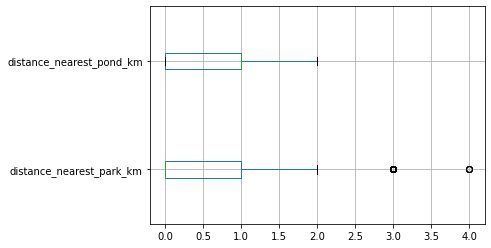

In [111]:
real_estate_data.boxplot(column=['distance_nearest_park_km', 'distance_nearest_pond_km'], vert=False)
plt.show()

**Выводы**  
Парки и водоемы очень на дистанции менее 3 км. болшая редкость. Недвижимость с близким растоянием до водоемов встречается чаще чем с анологичным растоянием до парков.

### Изучим, как быстро продавались квартиры.

In [112]:
real_estate_data['days_exposition'].describe()

count    15709.000000
mean       182.361767
std        223.332727
min          1.000000
25%         43.000000
50%         96.000000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

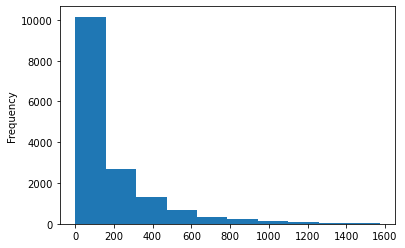

In [113]:
real_estate_data['days_exposition'].plot(kind='hist', bins=10)

* Посчитаем среднее и медиану.

In [114]:
days_exp_avg = real_estate_data['days_exposition'].mean()
days_exp_median = real_estate_data['days_exposition'].median()

print(f'В среднем квартира продавалась: {days_exp_avg:.2f}')
print(f'Медианное значение этого показателя: {days_exp_median}')

В среднем квартира продавалась: 182.36
Медианное значение этого показателя: 96.0


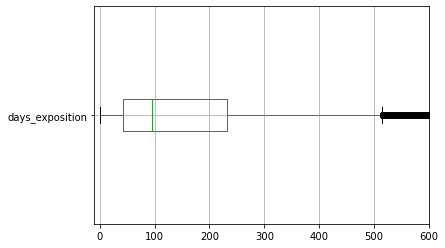

In [115]:
plt.xlim(-10, 600)
real_estate_data.boxplot(column='days_exposition', vert=False)
plt.show()

* 1ый квартиль заканчивается на 45
* 3ий квартиль заканчивается на 231
* В общем квартиры продаются от 45 дней до 230 дней.

**Выводы**
* В среднем продажа занимает около 100 дней.
* Если квартира продается быстрее чем за 45 дней это нормально, а вот если быстрее 1-2 недель будет вглядеть очень странно.Возможно продавец возможно снял объект с продажи и передумал продавать. Буду отсекть временой промежуток от 1 недели
* Если квартира продается дольше чем 230 дней буду считать очень долгими продажами


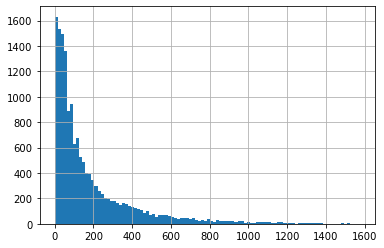

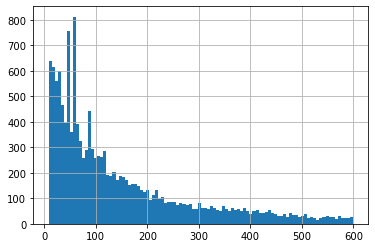

In [116]:
good_days_exp = real_estate_data.query('days_exposition > 7 and days_exposition < 600')

real_estate_data['days_exposition'].hist(bins= 100)
plt.show()

good_days_exp['days_exposition'].hist(bins=100)
plt.show()

На графике выделяются 3 пика, когда происходит продажа квартир до 100 дней.

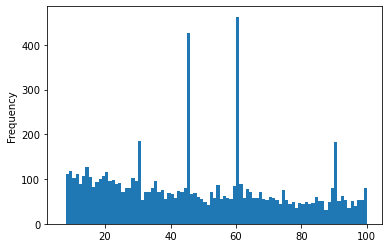

In [117]:
good_days_exp['days_exposition'].plot(kind='hist', range=(7, 100), bins=93)
plt.show()

При детальном расмотрении продаж за 100 дней:
* Первые 25 дней после выставления на продажу в среднем квартиры продажу покупаются с одинаковой частотой, потом идет планое снижение продаж. То есть интересные предложения которые устраивают покупателя и продавца долго не стоят в продаже.
* Есть 4 пика, которые превышают средние дневные продажи в несколько раз. Эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил. Так как находятся на равном удалении от друг друга (30, 45, 60 и 90 дни после публикации)

### Изучим факторы больше всего влияющие на общую (полную) стоимость объекта?


Проверим, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

Возьмем предыдущие выводы, а именно:
1. Нормальные значения для общей площади от 12 до 120, остальное буду считать выбросом
1. Расматривать квартиры от 400тыс. до 12.5 млн
1. Высота потолков от 2.2 метра до 4 метров
1. Количество комнат от 0 до 6, больше 6 комнат выбросы
1. Этажность домов от 5 до 16 этажей.Дома этажностью выше 16 встречаются реже.
1. Растояния до центра города от 180м до 30 км.
1. Количество дней продажи от 1 недели до 230 дней.

In [118]:
area_query = 'total_area_m2 >= 12 and total_area_m2 <= 120'
price_query = 'price >= 4.0e+5 and price <= 12e+6'
celing_heght_query = 'ceiling_height_m >= 2.2 and ceiling_height_m <= 4.0'
num_rooms_query = 'number_of_rooms <= 6'
floors_query = 'total_floors <= 33'
dist_city_centers_query = 'distance_city_centers_km <= 30.0'
days_exp_query = 'days_exposition > 7 and days_exposition < 600'

In [119]:
data_for_corr = real_estate_data[['total_area_m2',
                                 'living_area_m2',
                                 'kitchen_area_m2',
                                 'number_of_rooms',
                                  'floor_status',
                                  'distance_city_centers_km',
                                  'days_exposition',
                                  'days_of_week_exposition',
                                  'month_exposition',
                                  'year_exposition',
                                  'price'
                                 ]].corr()

data_for_corr.style

,total_area_m2,living_area_m2,kitchen_area_m2,number_of_rooms,distance_city_centers_km,days_exposition,year_exposition,price
total_area_m2,1.000000,0.940242,0.618077,0.762607,-0.231265,0.161170,-0.082601,0.647948
living_area_m2,0.940242,1.000000,0.442786,0.849350,-0.230588,0.154074,-0.074620,0.561301
kitchen_area_m2,0.618077,0.442786,1.000000,0.290321,-0.190715,0.123109,-0.062178,0.517960
number_of_rooms,0.762607,0.849350,0.290321,1.000000,-0.183582,0.134555,-0.057597,0.368156
distance_city_centers_km,-0.231265,-0.230588,-0.190715,-0.183582,1.000000,-0.059071,0.030166,-0.206260
days_exposition,0.161170,0.154074,0.123109,0.134555,-0.059071,1.000000,-0.615293,0.086176
year_exposition,-0.082601,-0.074620,-0.062178,-0.057597,0.030166,-0.615293,1.000000,-0.040624
price,0.647948,0.561301,0.517960,0.368156,-0.206260,0.086176,-0.040624,1.000000


In [120]:
data_for_corr_clear = real_estate_data.query(area_query and price_query and celing_heght_query \
                                   and num_rooms_query and floors_query and dist_city_centers_query \
                                   and days_exp_query)

print('В данном наборе данных осталось {0} строк'.format(data_for_corr_clear.shape[0]))
      
good_data_for_corr = data_for_corr_clear[['total_area_m2',\
                                 'living_area_m2',\
                                 'kitchen_area_m2',\
                                 'number_of_rooms',\
                                  'floor',\
                                  'floor_status',\
                                  'days_exposition',\
                                  'distance_city_centers_km',\
                                  'days_of_week_exposition',\
                                  'month_exposition',\
                                  'year_exposition',\
                                  'price',\
                                  'price_per_meter',
                                 ]].corr()

good_data_for_corr.style.background_gradient('coolwarm')

В данном наборе данных осталось 14087 строк


,total_area_m2,living_area_m2,kitchen_area_m2,number_of_rooms,floor,days_exposition,distance_city_centers_km,year_exposition,price,price_per_meter
total_area_m2,1.000000,0.938657,0.624400,0.763268,-0.028832,0.133642,-0.218809,-0.077561,0.631807,0.298475
living_area_m2,0.938657,1.000000,0.447286,0.848572,-0.103015,0.124073,-0.217337,-0.071164,0.543809,0.212509
kitchen_area_m2,0.624400,0.447286,1.000000,0.286445,0.126071,0.100202,-0.185703,-0.034823,0.508295,0.386864
number_of_rooms,0.763268,0.848572,0.286445,1.000000,-0.158507,0.107487,-0.174538,-0.069581,0.351846,0.043246
floor,-0.028832,-0.103015,0.126071,-0.158507,1.000000,-0.028617,-0.003064,0.016954,0.011107,0.069469
days_exposition,0.133642,0.124073,0.100202,0.107487,-0.028617,1.000000,-0.028634,-0.483301,0.072778,0.045256
distance_city_centers_km,-0.218809,-0.217337,-0.185703,-0.174538,-0.003064,-0.028634,1.000000,0.019922,-0.185925,-0.318535
year_exposition,-0.077561,-0.071164,-0.034823,-0.069581,0.016954,-0.483301,0.019922,1.000000,-0.038460,0.025973
price,0.631807,0.543809,0.508295,0.351846,0.011107,0.072778,-0.185925,-0.038460,1.000000,0.764755
price_per_meter,0.298475,0.212509,0.386864,0.043246,0.069469,0.045256,-0.318535,0.025973,0.764755,1.000000


**Вывод**
В данном графике видна зависимость цены недвижимости от общей площади, жилой площади и площади кухни.
Связь с этой недвижимости не найдена.

### Размещение недвижимости в днях недели и по месяцам

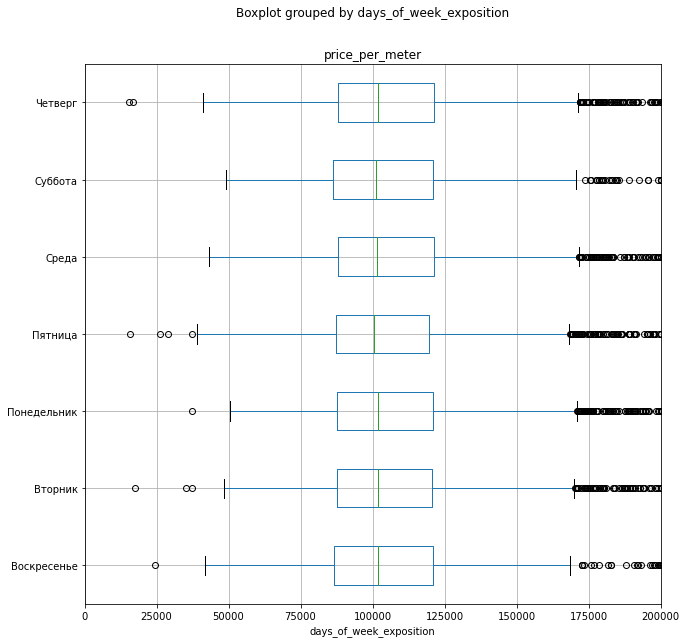

In [121]:
plot = real_estate_data.boxplot('price_per_meter',
                                by='days_of_week_exposition',vert=False,
                                figsize=(10,10)).set_xlim(0,200000)  

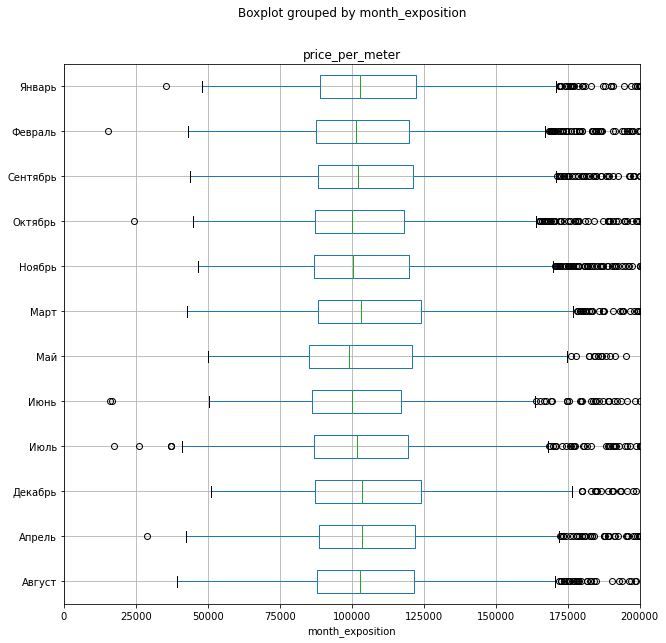

In [122]:
plot = real_estate_data.boxplot('price_per_meter',
                                by='month_exposition',vert=False,
                                figsize=(10,10)).set_xlim(0,200000)

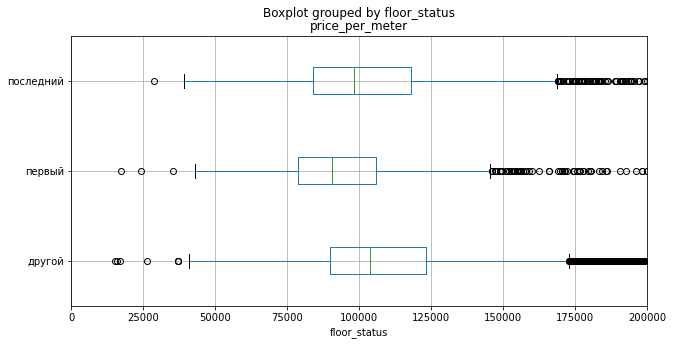

In [123]:
plot = real_estate_data.boxplot('price_per_meter',
                  by='floor_status', vert=False,
                  figsize=(10,5)).set_xlim(0,200000)

**Вывод**  
* Зависимости от дня недели и месяца размещения недвижимости нету
* Стоимость недвижимости дешевле на первом этаже в основном, немного дороже на последнем, дороже всего оценивают квартиры не напоследнем и не на первом этажах.

* Визуализируем зависимость цены недвижимости от её общей площади. 

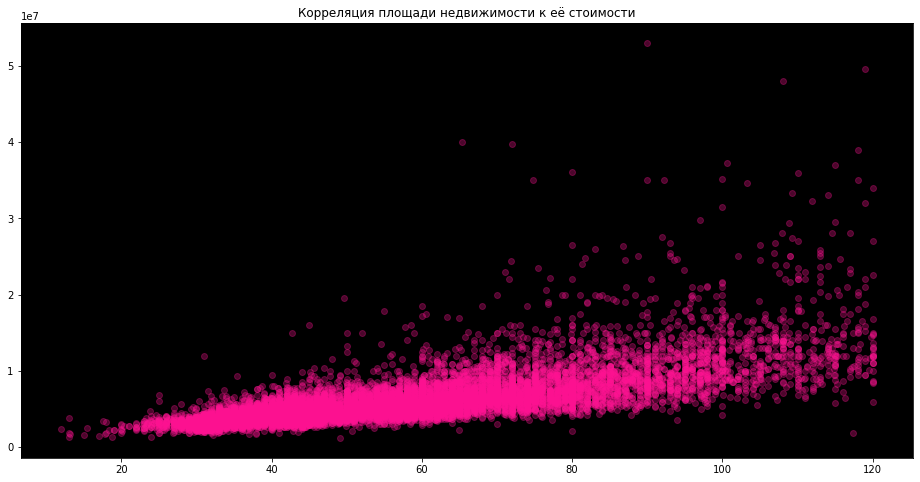

Корреляция составляет: 0.7390962203549571


In [124]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

data_for_corr_clear = data_for_corr_clear[(data_for_corr_clear['total_area_m2'] >= 12) & (data_for_corr_clear['total_area_m2'] <= 120)]
data_for_corr_clear = data_for_corr_clear[data_for_corr_clear['number_of_rooms']<=6]
x =  data_for_corr_clear['total_area_m2']   #  x - координаты точек
y =  data_for_corr_clear['price']    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink', alpha=0.3)    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
ax.set_title('Корреляция площади недвижимости к её стоимости')     #  заголовок для Axes

fig.set_figwidth(16)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

print('Корреляция составляет:', data_for_corr_clear['total_area_m2'].corr(data_for_corr_clear['price']))

* Визуализируем зависимость цены недвижимости от её жилой площади. 

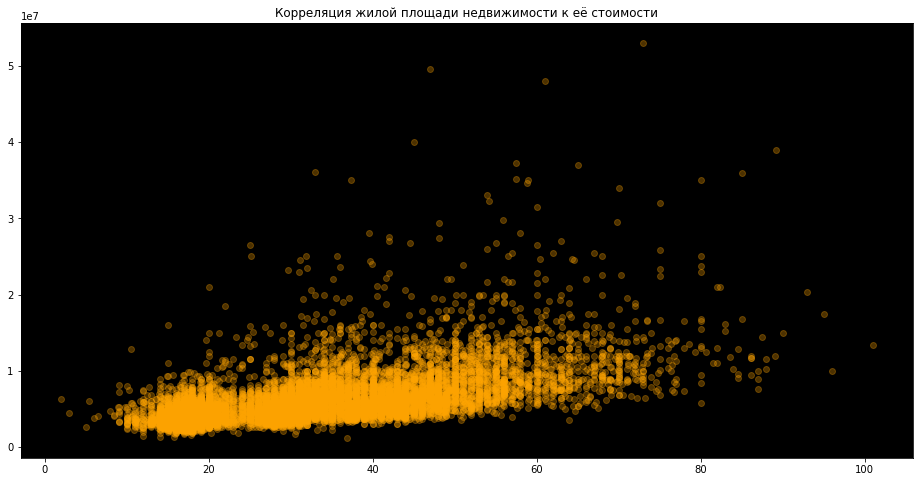

Корреляция составляет: 0.6077913587690297


In [125]:
x =  data_for_corr_clear['living_area_m2']   #  x - координаты точек
y =  data_for_corr_clear['price']    #  y - координаты точек

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(x, y, c = 'orange', alpha=0.3)    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
ax.set_title('Корреляция жилой площади недвижимости к её стоимости')     #  заголовок для Axes

plt.show()

print('Корреляция составляет:', data_for_corr_clear['living_area_m2'].corr(data_for_corr_clear['price']))

* Визуализируем зависимость цены недвижимости от её площади кухни. 

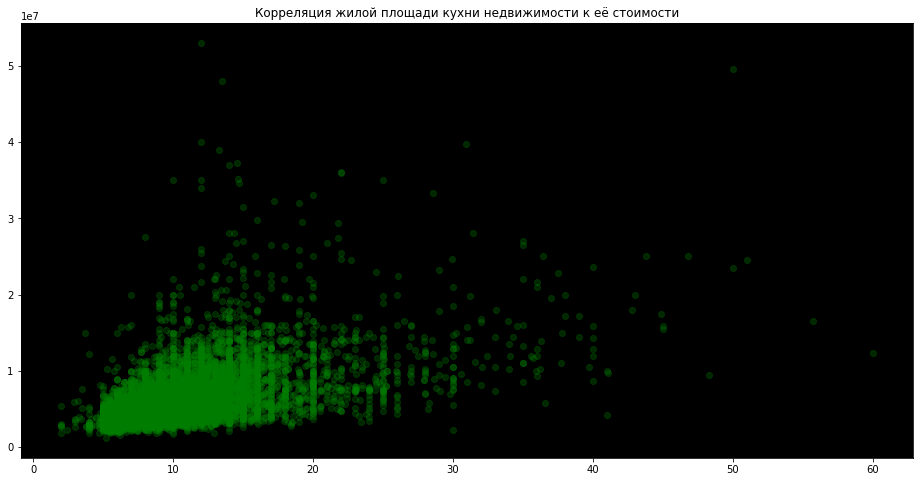

Корреляция составляет: 0.5534841453717173


In [126]:
x =  data_for_corr_clear['kitchen_area_m2']   #  x - координаты точек
y =  data_for_corr_clear['price']    #  y - координаты точек

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(x, y, c = 'green', alpha=0.3)    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
ax.set_title('Корреляция жилой площади кухни недвижимости к её стоимости')     #  заголовок для Axes

plt.show()

print('Корреляция составляет:', data_for_corr_clear['kitchen_area_m2'].corr(data_for_corr_clear['price']))

Вывод:
На графиках прослеживается связь площадей (общей, жилой и кухни) чем они больше тем дороже стоимость недвижимости

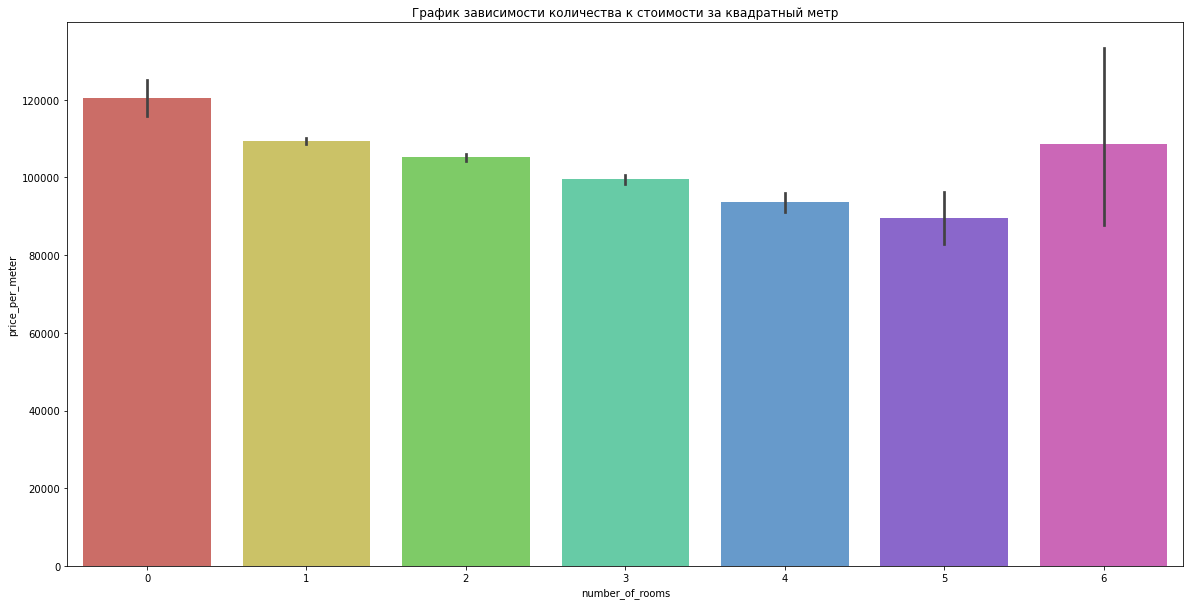

In [127]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20,10))
plt.title('График зависимости количества к стоимости за квадратный метр')

ax = sns.barplot(x='number_of_rooms', y='price_per_meter', palette='hls', data=data_for_corr_clear)

Вывод:
* Количество комнат не зависит от стоимости недвижимости за квадратный метр, 
    * так как продавец в недвижимости площадью 60кв.м. может расположить 6 комнат, а другой на такой же площади сделать 1 (студию). 

### Подсчет по 10 населеным пункта
Проверим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Найдем населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [128]:
print(data_for_corr_clear['city'].value_counts().head(10))

Санкт-Петербург      11488
поселок Шушары         377
Колпино                281
поселок Парголово      275
Пушкин                 260
Петергоф               156
Сестрорецк             142
Красное Село           141
Ломоносов               95
Кронштадт               80
Name: city, dtype: int64


Получили 10 населеных пунктов, некоторые из них считаются районама Санкт-Петербурга. 

Сгруппируем по городам, и выведем среднюю цену за квадратный метр в городе

In [129]:
city_group_per_meter = data_for_corr_clear.groupby('city').agg({'price_per_meter':'mean'})

city_group_per_meter.sort_values('price_per_meter', ascending=False).style.background_gradient('coolwarm')

,price_per_meter
city,
Зеленогорск,114233.776000
поселок Лисий Нос,113728.350000
Санкт-Петербург,108511.567841
Сестрорецк,102269.706972
Пушкин,100598.171808
поселок Левашово,96997.690000
поселок Репино,92727.270000
поселок Парголово,88965.592655
поселок Стрельна,88499.911429


In [130]:
(
    data_for_corr_clear.groupby('city')
               .agg({'price':'mean'})
                .sort_values('price', ascending=False).head(10)
)

,price
city,
Санкт-Петербург,6.134154e+06
Зеленогорск,5.899630e+06
Сестрорецк,5.859205e+06
Пушкин,5.450655e+06
поселок Репино,5.100000e+06
поселок Лисий Нос,4.827500e+06
поселок Стрельна,4.488829e+06
Павловск,4.435160e+06
поселок Парголово,4.392634e+06


In [131]:
top_10_city = data_for_corr_clear['city'].value_counts().head(10)
top_10_city

Санкт-Петербург      11488
поселок Шушары         377
Колпино                281
поселок Парголово      275
Пушкин                 260
Петергоф               156
Сестрорецк             142
Красное Село           141
Ломоносов               95
Кронштадт               80
Name: city, dtype: int64

In [132]:
(
    pd.pivot_table(data=data_for_corr_clear, index='city', values={'price':'mean'})
                .sort_values(by='price', ascending=False).head(10)
)

,price
city,
Санкт-Петербург,6.134154e+06
Зеленогорск,5.899630e+06
Сестрорецк,5.859205e+06
Пушкин,5.450655e+06
поселок Репино,5.100000e+06
поселок Лисий Нос,4.827500e+06
поселок Стрельна,4.488829e+06
Павловск,4.435160e+06
поселок Парголово,4.392634e+06


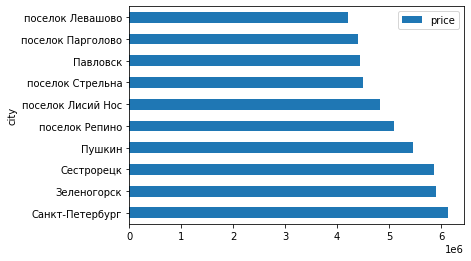

In [133]:
city_group_price = data_for_corr_clear.groupby('city').agg({'price':'mean'})
city_group_price.sort_values('price', ascending=False).head(10).plot(kind='barh');

* Самая дорогая недвижимость окказалась в поселках "Репино" и Александровская", возможно это какие-нибудь элитные котеджные поселки
* *Санкт-Петербург* оказался на третем месте по средней стоимости .
* Стоимость квадратного метра в пригороде Санкт-Петербурга дешевле, чем во второй столице страны. Что выглядит естественно.

Добавим столбец в которой будем отслеживать тип города (значения "Санкт-Петербург", "пригород")

In [134]:
def city_status(row):
    if row['city'] == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    else:
        return 'пригород'

In [135]:
real_estate_data['city_status'] = real_estate_data.apply(city_status, axis=1)

real_estate_data.groupby('city_status').agg({'price_per_meter':['mean', 'median']})

price_per_meter           
                           mean     median
city_status                               
Санкт-Петербург   114563.234869  104667.61
пригород           85218.509049   82000.00

Вывод:  
* Стомость квадратного метра в среднем 114 тысяч для Санкт-Петербурга
* Покупка недвижимости в пригороде обходиться дешевле на 30 тысяч за квадратный метр, чем столице

In [136]:
data_for_corr_clear.groupby('city').agg({'total_area_m2':'count', 'price':'median'}) \
    .sort_values(by = 'total_area_m2', ascending = False) \
    .rename(columns={'total_area_m2':'count'}).head(10)

,count,price
city,,
Санкт-Петербург,11488,5150000.0
поселок Шушары,377,3950000.0
Колпино,281,3570000.0
поселок Парголово,275,4050000.0
Пушкин,260,4825000.0
Петергоф,156,3600000.0
Сестрорецк,142,5225000.0
Красное Село,141,3255000.0
Ломоносов,95,3150000.0


In [137]:
# Проверим есть ли пустые значения в дистанции до центра города
data_for_corr_clear['distance_city_centers_km'].isnull().sum()

0

In [138]:
# Проверить значения до центра по квартилям
data_for_corr_clear['distance_city_centers_km'].describe()

count    13460.000000
mean        14.743982
std          8.453945
min          0.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         65.000000
Name: distance_city_centers_km, dtype: float64

* Первый квартиль заканчивается на 10 километрах,
* 2ой квартиль на 13 км. 
* 3ий квартиль - 16

Скорее всего первый квартиль отражает город Санкт-Петербург, 2ой квартиль дальние районы Санкт-Петербурга. Тритий квартиль уже пригороды. Возмем ограничение в 13 километров и проверим стоимость квадратного метра на каждый километр. 

In [139]:
data_dist_to_city_center_13km = data_for_corr_clear.query('distance_city_centers_km <= 13 and city == "Санкт-Петербург"')

In [140]:
data_dist_to_city_center_13km.groupby('distance_city_centers_km').\
    agg({'price_per_meter':'mean'}).\
    sort_values('price_per_meter', ascending=False).head(14).style.background_gradient('coolwarm')

,price_per_meter
distance_city_centers_km,
2.000000,139040.983091
1.000000,135813.902755
5.000000,133819.090037
6.000000,132298.618721
7.000000,132136.322555
4.000000,128097.868035
0.000000,124302.792727
8.000000,120124.317707
3.000000,113856.924158


Вывод:  
* Самые дорогие квартиры на растоянни 2,5 километров от центра города. В среднем стоимость квадратного метра для центра Санкт-Петербурга варируется от 440 до 650 тысяч
* Выделяется недвижимость на растоянии 7 км стоимостью 482 тысячи за квадратный метр.

In [141]:
# Выводит 10 строк с самыми недорогими объектми за квадратный метр
data_dist_to_city_center_13km.groupby('distance_city_centers_km').\
    agg({'price_per_meter':'mean'}).\
    sort_values('price_per_meter', ascending=False).tail(14)

,price_per_meter
distance_city_centers_km,
2.0,139040.983091
1.0,135813.902755
5.0,133819.090037
6.0,132298.618721
7.0,132136.322555
4.0,128097.868035
0.0,124302.792727
8.0,120124.317707
3.0,113856.924158


Вывод:
*  Можно было посмотреть варианты недвижимости в центре города, и за очень дешевую стоимость

In [142]:
def dist_city_round(row):
    return round(row['distance_city_centers_km'])

In [143]:
data_for_corr_clear.groupby('distance_city_centers_km').agg({'price_per_meter':['mean', 'median']}).style.background_gradient('coolwarm')

In [144]:
data_for_corr_clear.groupby('distance_city_centers_km').\
    agg({'price_per_meter':'mean'}).\
    sort_values('price_per_meter', ascending=False).tail(10).style.background_gradient('coolwarm')

,price_per_meter
distance_city_centers_km,
37.000000,75830.122727
50.000000,75180.546190
29.000000,74332.448673
52.000000,73817.670488
39.000000,71920.290000
65.000000,67843.870000
60.000000,65221.775000
62.000000,64860.265000
63.000000,62500.000000


Вывод:  
* Можно найти по приемлемой стоимости недвижимость в пригороде Санкт-Петербурга и Ленинградской области. Стоимость квадратного метра меньше в 10 раз от центра. 

In [145]:
# Посмотрим корреляцию стоимости недвижимости в Санкт-Петербурге
corr_in_center = data_dist_to_city_center_13km.corr()\
        .sort_values('price', ascending=False)\
        .filter(items = ['price'])\
        .reset_index()
corr_in_center.style.background_gradient('coolwarm')

,index,price
0,price,1.000000
1,total_area_m2,0.734282
2,price_per_meter,0.718543
3,living_area_m2,0.592145
4,kitchen_area_m2,0.569526
5,number_of_rooms,0.411723
6,ceiling_height_m,0.338428
7,ponds_around_3km,0.259948
8,parks_around_3km,0.164094
9,distance_nearest_park_km,0.160085


In [146]:
# Посмотрим корреляцию стоимости недвижимости в пригороде Санкт-Петербурга
data_dist_out_city_center_13km = data_for_corr_clear.query('distance_city_centers_km > 10')
corr_out_center = data_dist_out_city_center_13km.corr()\
        .sort_values('price', ascending=False)\
        .filter(items = ['price'])\
        .reset_index()
corr_out_center.style.background_gradient('coolwarm')

,index,price
0,price,1.000000
1,total_area_m2,0.794068
2,living_area_m2,0.643148
3,kitchen_area_m2,0.564980
4,price_per_meter,0.515080
5,number_of_rooms,0.490298
6,ceiling_height_m,0.311528
7,total_floors,0.224183
8,total_images,0.195417
9,number_of_balconies,0.151436


In [147]:
# Склеим таблицы для сравнения результатов
merge_data_corr = corr_in_center.merge(corr_out_center, on='index').\
    rename(columns={'price_x':'corr_price_in_city', 'price_y':'corr_price_out_city'})

merge_data_corr.style.background_gradient('coolwarm')

,index,corr_price_in_city,corr_price_out_city
0,price,1.000000,1.000000
1,total_area_m2,0.734282,0.794068
2,price_per_meter,0.718543,0.515080
3,living_area_m2,0.592145,0.643148
4,kitchen_area_m2,0.569526,0.564980
5,number_of_rooms,0.411723,0.490298
6,ceiling_height_m,0.338428,0.311528
7,ponds_around_3km,0.259948,0.036887
8,parks_around_3km,0.164094,0.046184
9,distance_nearest_park_km,0.160085,0.079991


Вывод:
* В городе Санкт-Петербурге цена зависит в большей степени от стомости за квадратный метр, в меньшей степени от площадей в недвижимости. 
* Для пригорода в основном играет гланую сотставляющую зависимость для цены  общая площадь недвижимости, вместе с жилой площадью и площадью кухни. Прослеживается связь с количеством комнат.

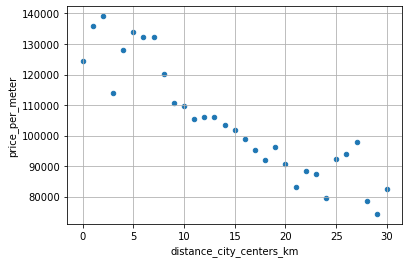

In [148]:
spb = data_for_corr_clear[data_for_corr_clear['distance_city_centers_km'] <= 30]
spb = spb.groupby('distance_city_centers_km').agg({'price_per_meter':'mean'})
(
    pd.DataFrame(spb.pivot_table(index='distance_city_centers_km', values='price_per_meter').to_records())
    .plot(x='distance_city_centers_km', y='price_per_meter', kind='scatter', grid=True)
)
plt.show()

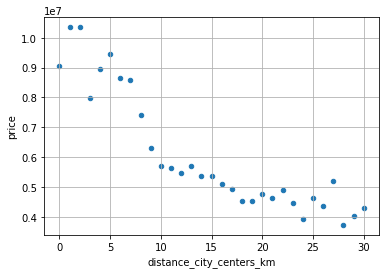

In [149]:
spb = data_for_corr_clear[data_for_corr_clear['distance_city_centers_km'] <= 30]
spb = spb.groupby('distance_city_centers_km').agg({'price':'mean'})
(
    pd.DataFrame(spb.pivot_table(index='distance_city_centers_km', values='price').to_records())
    .plot(x='distance_city_centers_km', y='price', kind='scatter', grid=True)
)
plt.show()

**Вывод:**
* Зная стоимость квадратного метра для центр, можно с увереностью в центе Санкт-Петербурга до 5 км. продаются очень большие квартиры.
* На растоянии от 5 до 10 км есть резкое снижение цен на недвижимость. Это связано с большим количеством построек Советской эпохи и естественным снижением стоимости за квадратный метр.
* После 10км. идет плавное снижение средней стоимости недвижимости, чем дальше тем дешевле, что естественно.

**Ввывод**
* Самая дорогая недвижимиость в Санкт-Петербурге на ростоянии до 7км. от цента в среднем очень дорогая за кваддратный метр, и не слишком сильно отличается.
* После 7км идет плавное понижение стоимости квадратного метра

## Общий вывод

* Недвижимость в цетре *Санкт-Петербурга* в основном очень дорогая, на стоимость которой влияет общая площадь недвижимости. Также в высокую стоимость недвижимости и близкое расположение к центру города. Но если искать можно подыскать объекты недвижимости в центре по приемлемым ценам.
* Можно выделить золотую середину по средним ценам и средней цене за квадратный метр это растояние 7.5 км. На этом растоянии приемлемые цены и близость к центру. На этом растоянии хорошо развита транспортная инфраструктура в целом.
* Чем дальше от центра тем дешевле недвижимость, здесь главные таргеты стомости недвижимости:
    * Общая площадь и жилая площадь 
    * Количество комнат
    * Высота потолков  
В зависимости от предпочтений покупателя можно всегда подобрать недвижимость учитывающую его желания.


* Наборе данных было очень много пропущеных данных, желательно уделить больше внимания коректности заполнения форм, добавить контроль о некорректности данных при отправке запроса формы на обрабтку данных.
* Подумать над развитием в дальнейшей формы. Добавить колонки, расположение детсадов, школ,  больниц, дистанцию до ближайшего метро. Возможно будет расмотреть зависимость цен недвижимости от близости до метро.